In [9]:
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.signal import find_peaks
import os
import numpy as np
from astropy.table import Table
from astropy.io import fits
import lightkurve as lk
import elk
from elk.ensemble import EnsembleLC
import sys

catalog = "galaxies with Cepheids"
directory = '../elk/elk results/'+catalog
catalog_q = 'Galaxies with Cepheids 20m 21'
method = 'full_hybrid'

In [12]:
#create image with random apertures from sample
from PIL import Image
import os
img_dir = '../figures/aperture comparisons/non-AGN'
img_list = [f for f in os.listdir(img_dir) if f.endswith('.png')]
w,h = Image.open(os.path.join(img_dir, img_list[0])).size
output = Image.new('RGBA', (w*3, h*5))
for i, img_file in enumerate(img_list):
    img = Image.open(os.path.join(img_dir, img_file))
    output.paste(img, (w*(i%3), h*(i//3)))
output.save('../figures/aperture comparison non-AGN.png')
print('Donemark')

Donemark


In [5]:
#number of pixels in diameter aperture by distance
import math
xax = [5.915, 0.8855, 3.665, 1.155, 17.19]
for h in range(len(xax)):
    count = 0
    max_offset = math.ceil(xax[h] * 60 / 21.2 / 2)
    for i in range(-max_offset, max_offset + 1):
        for j in range(-max_offset, max_offset + 1):
            dist = math.sqrt(i**2 + j**2)
            if dist <= xax[h] * 60 / 21.2 / 2:
                count += 1
    print(count)

221
5
89
9
1861


In [6]:
#number of targets in elk folder
import os
folder_path = "D:results new/elk globular clusters extra"
files = os.listdir(folder_path)
clusters = set()
for file in files:
    parts = file.split("_")
    if "output" in parts[0]:
        parts[0] = parts[0].replace("output", "")
    cluster = parts[0]
    cluster = cluster.replace(" ", "")
    clusters.add(cluster)
print(len(clusters))
print(clusters)

14
{'NGC5694', 'NGC6541', 'NGC5986', 'NGC1851', 'NGC4833', 'Haute-Provence1', 'NGC362', 'M92', 'M62', 'NGC6388', 'NGC4372', 'NGC2808', 'ESO280-SC06', 'M79'}


In [71]:
    #get number of light curves per quaver directory
    import os
    directory = 'diameter redos/MW GCs diameter redonew 102'
    directory_path = 'D:results new/'+directory
    """for directory in os.listdir('D:results new/x'): 
    directory_path = 'D:results new/x/'+directory #"""
    folders, no_lc, not_observed, total_lc, diameter_lc = 0, 0, 0, 0, 0
    for folder in os.listdir(directory_path):
        folders += 1
        folder_path = os.path.join(directory_path, folder)
        nontext = False
        total_files = 0
        for file_name in os.listdir(folder_path):
            total_files += 1
            if not file_name.endswith('.txt'):
                nontext = True
            if file_name.endswith('.dat'):
                if file_name.endswith('diameter.dat'):
                    diameter_lc += 1/3
                else:
                    total_lc += 1/3
        if nontext == False:
            no_lc += 1
        if total_files == 1:
            not_observed += 1
            
    print(f'{directory}\t{folders}\t{not_observed}\t{no_lc}\t{round(total_lc,2)}\t{round(diameter_lc,2)}')
        
"""print('\ttotal objects:', folders)
print('\tnot observed:', not_observed)
print('\tno light curve:', no_lc)
print('\ttotal light curves:', round(total_lc,2)) #"""

diameter redos/MW GCs diameter redonew 102	102	38	42	0	171.0


"print('\ttotal objects:', folders)\nprint('\tnot observed:', not_observed)\nprint('\tno light curve:', no_lc)\nprint('\ttotal light curves:', round(total_lc,2)) #"

In [27]:
#get Simbad Imag
from astroquery.simbad import Simbad
import os
directory = 'D:results new/Simbad QSO other otypes 14.5 Rmag 104'
galaxies = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
for galaxy in galaxies:
    try:
        customSimbad = Simbad()
        customSimbad.add_votable_fields('flux(I)')
        result = customSimbad.query_object(galaxy)
        fluxi = result['FLUX_I'][0]
        print(galaxy, '\t', fluxi)
    except TypeError:
        print(galaxy,'\tnot found')
        pass 

1E0754+39.3 	 --
2MASSJ01291097-2141569 	 --
2MASSJ09043696+5536026 	 --
2MASSJ17453826+2908221 	 --
2MASXJ16363129+4202429 	 13.52
2MFGC1336 	 --
3C84 	 --
4FGLJ1518.6+4044 	 --
ATO J176.4186-18.4541 	 --
Circinus Galaxy 	 10.0
ESO113-45 	 --
ESO141-55 	 --
ESO235-26 	 --
ESO244-30 	 --
ESO265-23 	 --
ESO267-13 	 13.4
ESO327-35 	 --
ESO350-38 	 --
ESO357-9 	 --
ESO362-21 	 --
ESO373-13 	 --
ESO572-34 	 14.4
ESO75-41 	 --
FRL1116 	 --
FRL303 	 --
IC1531 	 --
IC4296 	 10.79
ICRFJ040106.6-160639 	 --
ICRFJ092338.8-213547 	 --
ICRFJ114722.1+350107 	 --
ICRFJ123131.3+641418 	 --
ICRFJ130533.0-103319 	 --
ICRFJ141946.5+542314 	 --
ICRFJ141949.7-192825 	 --
ICRFJ151141.2+051809 	 --
ICRFJ151640.2+001501 	 --
ICRFJ152433.4-301221 	 --
ICRFJ155821.9-140959 	 --
ICRFJ160338.0+155402 	 --
ICRFJ171914.4+485849 	 --
ICRFJ181935.0-634548 	 --
ICRFJ183503.3+324146 	 --
ICRFJ204237.3+750802 	 --
ICRFJ232721.9+152437 	 --
LEDA1246251 	 --
LEDA133691 	 --
LEDA170103 	 --
LEDA3082731 	 --
LEDA37161 	 --

In [41]:
#number of lc with increased TPF size
sample = 'non-AGN Imag 30am 700'

import re
directory = 'D:results new/'+sample
yes, no, yesyes = 0, 0, 0
for galaxy in os.listdir(directory):
    for file in os.listdir(directory+'/'+galaxy):
        found, found2 = False, False
        if '_info_' in file and 'diameter' not in file:
            with open(directory+'/'+galaxy+'/'+file, 'r') as f:
                info = f.readlines()
                for line in info:
                    match = re.search("Increase TPF size to", line)
                    if match:
                        for line in info:
                            match = re.search("Nope, still too huge", line)
                            match2 = re.search("Edge pixels in the aperture. Skip this sector.", line)
                            match3 = re.search('Too many cadences have NaNs or are all zero', line)
                            match4 = re.search('Negative threshold!', line)
                            match5 = re.search('Tried to remove central pixel!', line)
                            if match or match2 or match3 or match4 or match5:
                                found = True
                                break
                        if not found:
                            yes += 1
                            found2 = True
                            print(file)
                        break
                if not found2:
                    no += 1
print('\n', yes, '\t', no)

"""AGN sample:
ESO101-22_info_66.txt
MCG-01-55-011_info_42.txt
QSOJ0217+0144_info_31.txt
3 	 2189"""

ESO116-12_info_2.txt
ESO116-12_info_29.txt
ESO116-12_info_69.txt
3 	 2052


'AGN sample:\nESO101-22_info_66.txt\nMCG-01-55-011_info_42.txt\nQSOJ0217+0144_info_31.txt\n3 \t 2189'

In [4]:
#number of sectors rejected due to aperture size
sample = 'AGN Imag 700'

import os
import re
directory = 'E:results new/'+sample
yes, no = 0, 0
for galaxy in os.listdir(directory):
    for file in os.listdir(directory+'/'+galaxy):
        found2 = False
        if '_info_' in file and 'diameter' not in file:
            with open(directory+'/'+galaxy+'/'+file, 'r') as f:
                info = f.readlines()
                for line in info:
                    match = re.search("Nope, still too huge", line)
                    match2 = re.search("Edge pixels in the aperture. Skip this sector.", line)
                    if match or match2:
                        yes += 1
                        found2 = True
                        break
                if not found2:
                    no += 1
print(yes, '\t', no)


 16 	 2176


In [27]:
#number of galaxies rejected for diameter size
import re
sample = 'AGN candidates Rmag 135'
directory = 'E:results new/'+sample
#directory = 'E:results new/diameter redoredos/'+sample+' diameter redoredo'
yes = 0
for galaxy in os.listdir(directory):
    if len(os.listdir(directory+'/'+galaxy)) == 1:
        #print(galaxy)
        with open(directory+'/'+galaxy+'/'+galaxy+'_info.txt', 'r') as f:
        #with open(directory+'/'+galaxy+'/'+galaxy+'_diameter_info.txt', 'r') as f:
            info = f.readlines()
            for line in info:
                match = re.search("This object has not been observed by TESS", line)
                if match:
                    yes += 1
print(yes)

1


In [22]:
#matching entries in two lists of galaxies
from astroquery.simbad import Simbad
folder = 'non-AGN Imag 30am 700'
directory = 'D:results new/'+folder
lines = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
galaxies = ['UGC816', 'IC1231', 'UGC3673', 'MCG+07-15-006', 'UGC3863', 'NGC2500', 'NGC5585', 'NGC5633', 'NGC1199', 'NGC1179', 'NGC1232', 'NGC1299', 'NGC1285', 'NGC1309', 'NGC1297', 'NGC1255', 'NGC1302', 'NGC1292', 'NGC1288', 'ESO357-12', 'NGC1325', 'ESO548-10', 'IC1953', 'ESO357-29', 'NGC1417', 'NGC1376', 'MCG-03-10-042', 'NGC1359', 'NGC1367', 'NGC1385', 'NGC1398', 'NGC1425', 'NGC1406', 'MCG-01-10-035', 'MCG-03-10-045', 'IC2007', 'IC1993', 'IC2006', 'NGC1507', 'NGC1542', 'NGC1532', 'NGC1592', 'NGC1620', 'NGC1627', 'UGC3171', 'NGC1638', 'NGC1640', 'NGC1679', 'UGC3214', 'NGC1729', 'MCG-02-13-036', 'NGC1723', 'NGC1744', 'IC2106', 'UGC3258', 'IC402', 'ESO422-41', 'NGC1800', 'NGC1827', 'MCG-03-14-017', 'NGC1954', 'IC2135', 'NGC2076', 'IC2143', 'IC2147', 'NGC2090', 'UGCA116', 'UGCA114', 'NGC2124', 'IC2152', 'ESO555-27', 'NGC2139', 'ESO489-6', 'ESO488-60', 'ESO425-10', 'ESO364-29', 'UGCA127', 'NGC2196', 'MCG-04-15-016', 'ESO489-29', 'NGC2227', 'NGC2223', 'ESO557-9', 'ESO490-37', 'NGC2280', 'NGC2272', 'UGC3532', 'UGC3535', 'UGC3630', 'ESO491-13', 'MCG+05-17-015', '2MASXJ07112010+3108410', 'ESO492-2', 'ESO491-21', 'ESO428-4', 'ESO428-32', 'ESO428-29', 'ESO367-17', 'UGC3944', 'ESO428-37', 'UGC4054', 'ESO494-7', 'IC497', 'NGC2525', 'ESO430-20', 'NGC2566', 'NGC2559', 'ESO495-11', 'MCG-02-22-017', 'ESO495-21', 'ESO563-21', 'ESO371-16', 'ESO371-20', 'NGC7307', 'NGC7412', 'NGC7531', 'NGC7599', 'ESO298-28', 'NGC7368', 'NGC7424', 'NGC7462', 'ESO293-34', 'NGC7154', 'ESO404-23', 'IC5273', 'IC5270', 'ESO406-26', 'NGC7421', 'NGC7713', 'ESO404-27', 'IC5332', 'IC1826', 'NGC7221', 'NGC7229', 'NGC7793', 'NGC101', 'NGC642', 'ESO467-27', 'NGC7755', 'ESO411-34', 'NGC775', 'ESO479-4', 'ESO478-6', 'IC5078', 'NGC24', 'ESO476-8', 'ESO544-30', 'NGC899', 'NGC1145', 'NGC7183', 'NGC1114', 'NGC7218', 'NGC7246', 'NGC887', 'NGC1076', 'NGC7709', 'NGC210', 'NGC178', 'NGC7371', 'NGC255', 'IC210', 'NGC873', 'NGC7309', 'NGC7606', 'NGC309', 'NGC701', 'NGC755', 'NGC991', 'NGC1035', 'NGC1051', 'NGC1042', 'UGCA432', 'NGC7721', 'IC1528', 'NGC47', 'MCG-01-03-065', 'NGC337', 'MCG-01-03-085', 'NGC779', 'IC1575', 'KUV02554-0233', 'NGC245', 'NGC936', 'NGC955', 'NGC941', 'NGC1087', 'NGC521', 'NGC493', 'NGC622', 'NGC1073', 'NGC1055', 'NGC474', 'NGC718', 'NGC1029', 'NGC7817', 'NGC772', 'IC5104', 'NGC397', 'NGC392', 'NGC394', 'UGC12173', 'UGC594', 'NGC949', 'UGCA150', 'NGC2848', 'NGC2835', 'ESO433-10', 'MCG-02-25-002', 'NGC2902', 'NGC2968', 'NGC2967', 'IC2507', 'ESO499-5', 'NGC3054', 'NGC2997', 'ESO374-3', 'NGC3038', 'NGC3124', 'NGC3096', 'NGC3091', 'NGC3085', 'MCG-03-26-006', 'IC2531', 'NGC3113', 'ESO435-19', 'IC2539', 'NGC3120', 'NGC3145', 'ESO436-1', 'NGC3175', 'NGC3157', 'UGC5667', 'NGC3244', 'ESO317-34', 'IC630', 'NGC3321', 'ESO501-23', 'NGC3316', '2MASXJ10364122-2733392', 'NGC3308', '2MASXJ10362764-2719092', 'ESO501-49', 'NGC3311', 'NGC3336', '6dFGSgJ103629.1-272903', 'NGC3309', '6dFGSgJ103623.1-272115', '2MASXJ10364490-2728102', 'ESO437-14', 'NGC3365', 'ESO569-14', 'NGC3358', 'NGC3437', 'NGC3464', 'NGC3511', 'NGC3534', 'MCG+05-26-064', 'NGC3521', 'IC2627', 'ESO503-1', 'NGC3596', 'NGC3673', 'MCG-05-27-003', 'ESO319-11', 'NGC3763', 'NGC3717', 'ESO378-3', 'NGC3749', 'UGC6608', 'MCG-01-30-032', 'UGCA241', 'LEDA36445', 'UGC6903', 'Mrk1309', 'NGC3981', 'NGC3956', 'NGC3936', 'ESO440-11', 'ESO440-27', 'ESO321-1', 'NGC4062', 'NGC4030', 'NGC4129', 'NGC4094', 'ESO505-13', 'IC2995', 'IC764', 'IC3005', 'IC3015', 'IC783', 'ESO321-25', 'IC3475', 'NGC4478', 'IC3393', 'IC794', 'M86', 'IC3303', 'IC3349', 'IC3358', 'LEDA40659', 'NAMEReinmuth80', 'NGC4348', 'NGC4487', 'NGC4504', 'NGC4433', 'IC3253', 'NGC4635', 'NGC4640', 'IC810', 'UGC7911', 'NGC4632', 'NGC4592', 'NGC4653', 'UGCA289', 'MCG-01-33-001', 'NGC4597', 'NGC4658', 'MCG-06-28-013', 'NGC4574', 'ESO322-27', 'ESO322-60', 'NGC4603', 'NGC4575', 'NGC4771', 'UGC8041', 'NGC4666', 'NGC4705', 'MCG-01-33-003', 'NGC4775', 'NGC4682', 'MCG-02-33-020', 'NGC4780', 'MCG-02-33-015', 'NGC4699', 'MCG-02-33-017', 'ESO507-27', 'ESO507-13', 'ESO322-81', 'NGC4679', 'ESO323-25', 'NGC4886', 'NGC4867', 'NGC4865', 'IC3959', 'NGC4873', 'SDSSJ130017.67+275718.9', '[D80]ACO1656120', 'NGC4906', 'NGC4864', 'IC4051', 'NGC4883', 'NGC4889', 'MCG-01-33-059', 'IC3908', 'NGC4838', 'NGC4924', 'NGC4877', 'NGC4902', 'ESO507-62', 'NGC4965', 'MCG-05-31-008', 'ESO443-22', 'ESO443-43', 'ESO443-28', 'IC844', 'NGC4905', 'ESO381-51', 'ESO381-32', 'ESO381-47', 'ESO381-46', 'NGC4953', 'ESO323-79', 'NGC4909', 'NGC4981', 'UGCA338', 'MCG-03-34-014', 'NGC4970', 'ESO508-24', 'MCG-04-31-046', 'LEDA715500', 'NAMEHardcastleNebula', 'ESO382-24', 'NGC5062', 'ESO382-34', 'ESO382-23', 'ESO323-99', 'NGC5170', 'ESO576-50', 'IC4237', 'NGC5134', 'NGC5085', 'ESO508-44', 'ESO509-8', 'IC4255', 'IC4252', 'MCG-05-32-002', 'ESO444-30', 'ESO444-25', 'NGC5126', 'LEDA47047', 'ESO444-46', 'ESO382-58', 'ESO383-5', 'ESO382-54', 'NGC5102', 'ESO324-23', 'ESO324-24', 'NGC5254', 'NGC5247', 'ESO509-74', 'IC4293', 'IC4288', 'IC4290', 'IC4289', 'ESO445-8', 'ESO444-76', 'NGC5193', 'ESO444-87', 'ESO383-45', 'ESO383-37', 'NGC5324', 'IC4320', 'IC4319', 'ESO445-15', 'ESO445-14', 'IC4326', 'ESO445-28', 'ESO445-56', 'ESO445-35', 'NGC5304', 'MCG-05-33-011', 'ESO445-40', 'ESO445-42', 'ESO383-76', 'ESO325-4', 'MCG-06-30-022', 'NGC5334', 'NGC5426', 'ESO510-33', 'ESO510-7', 'ESO510-12', 'ESO510-11', 'ESO445-75', 'NGC5330', 'ESO445-65', 'NGC5397', 'ESO384-29', 'ESO384-12', 'ESO384-36', 'IC4352', 'NGC5398', 'ESO384-26', 'ESO384-13', 'ESO325-40', 'NGC5496', 'NGC5476', 'NGC5468', 'ESO510-58', 'ESO510-56', 'ESO510-70', 'ESO510-74', 'ESO510-66', 'ESO446-31', 'NGC5494', 'ESO384-49', 'IC4366', 'ESO384-55', 'IC4367', 'UGC9235', 'UGC9215', 'NGC5584', 'NGC5534', 'IC991', 'MCG+06-32-070', 'NGC5656', 'UGC9284', 'MCG+06-32-058a', 'NGC5623', 'NGC5740', 'NGC5691', 'IC1055', 'NGC5716', 'UGCA394', 'UGCA396', 'NGC5781', 'ESO580-52', 'ESO280-13', 'ESO336-16', 'ESO399-25', 'IC5020', 'ESO449-5', 'NGC6925', 'IC5041', 'ESO513-15', 'ESO460-29', 'IC5005', 'ESO462-16', 'IC4999', 'ESO581-25', 'ESO582-12', 'ESO597-41', 'IC4536', 'ESO595-14', 'NGC5892', 'MCG-02-38-030', 'NGC5878', 'UGCA400', 'NGC5915', 'NGC5885', 'NGC6118', 'MCG+00-38-026', 'NGC5845', 'NGC5839', 'NGC5964', 'NGC6207', 'NGC1487', 'NGC1558', 'NGC1495', 'NGC1448', 'ESO300-14', 'NGC2104', 'NGC1494', 'NGC1483', 'NGC2502', 'IC2000', 'ESO163-11', 'ESO162-17', 'NGC1853', 'NGC1546', 'NGC1602', 'IC2058', 'NGC1515', 'IC1959', 'IC1954', 'ESO316-18', 'NGC1703', 'NGC1688', 'NGC1543', 'NGC1533', 'NGC2417', 'NGC2082', 'NGC1796', 'ESO85-30', 'ESO116-12', 'ESO263-21', 'ESO263-5', 'ESO86-62', 'NGC1892', 'ESO84-14', 'NGC1559', 'NGC3261', 'ESO126-3', 'NGC2150', '2MASXJ05381301-6751215', 'NGC1809', '2MASXJ05314916-6721339', 'NGC1490', 'ESO197-10', 'NGC692', 'ESO126-25', 'ESO126-13', 'ESO91-7', 'ESO91-3', 'ESO56-154', 'NGC1511', 'NGC2466', 'IC1627', 'ESO92-6', 'ESO61-15', 'ESO215-31', 'ESO215-37', 'NGC3059', 'NGC434', 'ESO37-10', 'ESO51-11', 'NGC98', 'ESO63-11', 'ESO3-7', 'ESO79-3', 'NGC3882', 'ESO12-12', 'ESO217-22', 'NGC7637', 'ESO9-10', 'NGC7095', 'NGC7329', 'IC4522', 'IC5244', 'NGC4835', 'ESO42-7', 'IC4633', 'IC5071', 'NGC7219', 'ESO108-23', 'ESO269-57', '2MASXJ13513848-5835153', 'IC4661', 'ESO270-6', 'ESO269-85', 'NGC5156', 'ESO220-28', 'ESO221-7', 'IC4595', 'NGC6808', 'IC5092', 'IC5096', 'ESO174-3', 'NGC7140', 'ESO221-32', 'ESO136-12', 'ESO100-23', 'ESO100-8', 'ESO104-19', 'ESO104-22', 'NGC6744', 'NGC7090', 'NGC7106', 'ESO289-9', 'NGC7232', 'ESO271-10', 'ESO136-20', 'ESO137-18', 'NGC6156', 'IC4656', 'IC4770', 'IC4767', 'IC4765', 'ESO104-8', 'IC4766', 'IC4831', 'IC4869', 'IC4901', 'NGC5408', 'NGC5483', '2MASXJ16351917-5813077', 'ESO138-9', 'NGC6215', 'ESO138-17', 'ESO138-24', 'IC4646', 'IC4871', 'ESO186-62', 'NGC6937', 'NGC6948', 'IC4472', 'NGC5688', 'LEDA60032', 'IC4679', 'IC4719', 'IC4720', 'IC4821', 'NGC6780', 'IC4889', 'ESO235-55', 'NGC7038', 'NGC7070', 'NGC6707', 'IC4839', 'ESO184-47', 'ESO342-46', 'ESO342-43', 'ESO233-35', 'ESO233-34', 'ESO286-18', 'ESO328-43', 'NGC6902', 'ESO328-46', '2MASXJ09591870-1928233', 'NGC4387', 'NGC708', 'NGC134', 'MCG-01-24-010', 'ESO443-69', 'MCG+00-36-018', '2MASXJ20095889-4821262', 'NGC406', 'NGC450', 'IC1933', 'NGC2263', 'ESO490-41', 'IC2537', 'NGC3663', 'LEDA89867', 'NGC7251', 'ESO445-89', 'NGC1084', 'NGC4038', 'NGC4948', 'NGC5042', 'ESO445-64', 'IC4618', 'NGC7151', 'NGC7764', '2MASXJ05063132-6816409', 'MWKZCLASSB2114+022GAL90002', '2MASXJ09233938+2426013', '2MASXJ06085498-6552559', 'UGC593', 'LEDA310568']

common = set(lines).intersection(galaxies)
print(len(common))
unique1 = [item for item in lines if item not in galaxies]
unique2 = [item for item in galaxies if item not in lines]
print(unique1)
print(unique2) 
"""

for gal in lines:
    bib = None
    try:
        customSimbad = Simbad()
        customSimbad.add_votable_fields('dimensions')
        result = customSimbad.query_object(gal)
        bib = result['GALDIM_BIBCODE'][0]
        print(gal,'\t',bib)
    except TypeError:
        print(gal,'not found')
        pass #"""

695
['ESO494-25', 'MWKZ CLASS B2114+022GAL90002', 'NAME Hardcastle Nebula', 'NAME Reinmuth 80', '[D80] ACO 1656 120']
['NAMEReinmuth80', '[D80]ACO1656120', 'NAMEHardcastleNebula', 'MWKZCLASSB2114+022GAL90002']


"\n\nfor gal in lines:\n    bib = None\n    try:\n        customSimbad = Simbad()\n        customSimbad.add_votable_fields('dimensions')\n        result = customSimbad.query_object(gal)\n        bib = result['GALDIM_BIBCODE'][0]\n        print(gal,'\t',bib)\n    except TypeError:\n        print(gal,'not found')\n        pass #"

In [23]:
"""original_stdout = sys.stdout 
sys.stdout = open('galaxies with Cepheids elk info.txt', 'w')"""

for folder in os.listdir(directory):
    for filename in os.listdir(directory+'/'+folder):
        if re.search(r"_lc_(\d+)\.fits", filename):
            galaxy = filename.split("_")[0]
            sector = filename.split("_")[2].replace(".fits", "") #"""
            galaxy = "NGC 2403"
            sector = "47" #73
            galaxyname = galaxy.strip().replace("â€“", "-").replace(" ","")
            path_q = "../quaver/results/"+catalog_q+'/'+galaxyname+'/'+galaxyname+'_sector'+sector+'_'+method+'_lc.dat'
            if not os.path.isfile(path_q):
                a = elk.ensemble.from_fits(directory+'/'+galaxy+'/'+galaxy+"output_table.fits")
                if len(a.lcs) > 0:
                    for sec in range(0,len(a.lcs)):
                        if a.lcs[sec].sector == float(sector):
                            lc_e = a.lcs[sec]
                            if hasattr(lc_e, 'sector'):
                                lc_e.to_periodogram(frequencies=np.logspace(-1, 1, 500))
                                lc_e.plot_periodogram(title=galaxy+', Sector '+sector+' (elk)', save_path='galaxies with Cepheids periodograms/'+galaxy+'_'+sector+'_elk_periodogram.png') 
                                break #"""
                plt.tight_layout()
                plt.savefig(galaxy+'_'+sector+'_elk_periodogram')
    
                stats = lc_e.get_stats_using_defaults()
                elk_peakfreqs = stats['peak_freqs']
                elp_peakpowers = stats['power_at_peaks']
                five_powers = sorted(elp_peakpowers, reverse=True)[:5]
                indices = sorted(range(len(elp_peakpowers)), key=lambda i: elp_peakpowers[i], reverse=True)[:5]
                five_freqs = [elk_peakfreqs[i] for i in indices]
                print('\n',galaxy,'sector',sector)
                print('peaks:', five_freqs)
                print('powers:', five_powers)
#sys.stdout = original_stdout

In [10]:
for folder in os.listdir(directory):
    for filename in os.listdir(directory+'/'+folder):
        if re.search(r"_lc_(\d+)\.fits", filename):
            galaxy = filename.split("_")[0]
            sector = filename.split("_")[2].replace(".fits", "")
            galaxyname = galaxy.strip().replace("â€“", "-").replace(" ","")
            path_q = "../quaver/results/"+catalog_q+'/'+galaxyname+'/'+galaxyname+'_sector'+sector+'_'+method+'_lc.dat'
            if not os.path.isfile(path_q):
                print(galaxy,sector)

CVn Dwarf Galaxy 23
CVn Dwarf Galaxy 49
CVn Dwarf Galaxy 50
Draco dSph 14
Draco dSph 15
Draco dSph 16
Draco dSph 17
Draco dSph 19
Draco dSph 20
Draco dSph 21
Draco dSph 22
Draco dSph 24
Draco dSph 25
Draco dSph 48
Draco dSph 49
Fornax dSph 30
Fornax dSph 4
IC 1613 42
Leo I dwarf galaxy 72
NGC 0055 2
NGC 0055 29
NGC 0300 2
NGC 2403 20
NGC 3031 14
NGC 3031 20
NGC 3031 21
NGC 3031 40
NGC 6822 54
PGC 3589 29
PGC 3589 69
Sextans dSph 35
Sextans dSph 8
UGC 9749 74
CVn Dwarf Galaxy 23
CVn Dwarf Galaxy 49
CVn Dwarf Galaxy 50
Fornax dSph 30
Fornax dSph 4
IC 1613 42
Leo I dwarf galaxy 72
NGC 6822 54


In [58]:
#attempt at saving combined periodograms

import matplotlib.pyplot as plt

# ... your code for creating plots with pg and elk ...

# Check permissions
import os
if not os.access('../comparison/', os.W_OK):
  print("Error: No write permission to directory. Check permissions.")
  exit()

# Try changing backend (optional)
# plt.switch_backend('pdf')  # Example, change 'pdf' to desired backend

plt.tight_layout()
plt.show()  # Render plots

try:
  plt.savefig('../comparison/'+galaxy+'_'+sector+'_periodograms')
except Exception as e:
  print(f"Error saving figure: {e}")


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [60]:
#getting Simbad diameter
with open('galaxies right now.txt', 'r') as file:
    g = file.readlines()

for i,target in enumerate(g):
    try:
        customSimbad = Simbad()
        customSimbad.add_votable_fields('dimensions')
        result = customSimbad.query_object(target)
        try:
            majaxis = result['GALDIM_MAJAXIS']
            minaxis = result['GALDIM_MINAXIS']
        except KeyError:
            print('KeyError when trying to access diameter')
            continue
        if (majaxis is None or not isinstance(majaxis[0], (int, float, np.float32))) and (minaxis is None or not isinstance(minaxis[0], (int, float, np.float32))):
            print('no diameter found, skip this object')
            continue
        elif (majaxis is None or not isinstance(majaxis[0], (int, float, np.float32))) and (minaxis is not None and isinstance(minaxis[0], (int, float, np.float32))):
            diameter = minaxis[0]
            print("diameter = minaxis =", diameter, "'")
        elif (majaxis is not None and isinstance(majaxis[0], (int, float, np.float32))) and (minaxis is None or not isinstance(minaxis[0], (int, float, np.float32))):
            diameter = majaxis[0]
            print("diameter = majaxis =", diameter, "'")
        else:
            diameter = (majaxis[0] + minaxis[0]) / 2
            #print('majaxis =',majaxis[0],"' ; minaxis =",minaxis[0],"'")
            #print("diameter =", diameter, "'")
            print(diameter)
    except TypeError:
        print('no diameter found, skip this object')
        continue 

0.6209999918937683
0.30400002002716064
1.2634999752044678
1.1039999723434448
1.0764999389648438
0.8395000100135803
3.3000001907348633
1.24399995803833
0.30400002002716064
1.1039999723434448
1.0764999389648438
2.7129998207092285
1.5520000457763672
3.555000066757202
1.403499960899353
1.0764999389648438
1.0290000438690186
1.5799999237060547
0.30400002002716064
1.027500033378601
0.7775000333786011
0.8395000100135803
1.2634999752044678
1.590000033378601
1.0750000476837158
1.8385000228881836
3.1449999809265137
1.5799999237060547
3.3000001907348633
1.0750000476837158
2.575000047683716
3.240000009536743
3.555000066757202
1.0290000438690186
3.555000066757202
1.0750000476837158
1.24399995803833
1.1549999713897705
3.3000001907348633
1.027500033378601
3.5950000286102295
1.565500020980835
1.0290000438690186
1.3930000066757202
3.1449999809265137
1.24399995803833
3.5399999618530273
1.5520000457763672
1.621000051498413
1.1549999713897705
1.934999942779541
3.4200000762939453
1.1549999713897705
0.337999

C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\astroquery\simbad\core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'CircinusGalaxy' this identifier has an incorrect format for catalog: 	C : Cluster
  warnings.warn("Warning: The script line number %i raised "
C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\astroquery\simbad\core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'CircinusGalaxy' this identifier has an incorrect format for catalog: 	C : Cluster
  warnings.warn("Warning: The script line number %i raised "
C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\astroquery\simbad\core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'CircinusGalaxy' this identifier has an incorrect format for catalog: 	C : Cluster

no diameter found, skip this object
no diameter found, skip this object
8.529999732971191
no diameter found, skip this object
6.475000381469727
4.610000133514404
0.934499979019165
0.934499979019165
1.8550000190734863
1.8550000190734863
1.8550000190734863
1.8550000190734863


In [57]:
#getting number of pixels in aperture
import re
import ast
import csv
directory = "Simbad brightest no AGN 169"
with open('galaxies right now.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t') 
    g = []
    s = []
    for row in reader:
        g.append(row[0]) 
        s.append(row[1])

for i,ga in enumerate(g):
    gal =  ga.strip().replace("â€“", "-").replace(" ","")
    try:
        #with open('../quaver/results/'+directory+'/'+gal+'/'+gal+'_info_'+str(s[i])+'.txt', 'r') as f:
        with open('D:/Masterarbeit/quaver/results/'+directory+'/'+gal+'/'+gal+'_info_'+str(s[i])+'.txt', 'r') as f:
        #with open('results/'+directory+'/'+gal+'/'+gal+'_info_'+str(s[i])+'.txt', 'r') as f:
            lines = f.readlines()
    except FileNotFoundError as e:
        print(e)
        continue
    for line in lines:
        match = re.search(r"(?i)^aperture mask:\s*\[(.*?)\]", line)
        if match:
            list_string = match.group(1)
            try:
                list_from_string = ast.literal_eval(list_string)
                list_length = len(list_from_string)
                print(gal,', sector',str(s[i]),':',list_length)
            except (ValueError, SyntaxError):
                print(f"Error parsing list in line: {line}")
            break

number of pixels in apertures
NGC1199 , sector 4 : 6
NGC7090 , sector 67 : 47
NGC7755 , sector 69 : 2
IC5273 , sector 68 : 26
NGC7412 , sector 68 : 26
ClKron28 , sector 68 : 11
ClKron28 , sector 1 : 15
ClKron28 , sector 67 : 17
ClKron28 , sector 28 : 18
NGC7329 , sector 67 : 29
ESO233-34 , sector 67 : 24
NGC1511 , sector 69 : 2
NGC1546 , sector 69 : 2
NGC7329 , sector 68 : 33
NGC392 , sector 17 : 6
IC4901 , sector 67 : 12
IC5092 , sector 67 : 16
NGC1029 , sector 70 : 2
NGC1533 , sector 69 : 4
NGC7232 , sector 68 : 2
NGC6902 , sector 67 : 17
NGC5584 , sector 51 : 6
ClKron28 , sector 27 : 18
ESO184-47 , sector 67 : 5
NGC1029 , sector 71 : 2
ESO233-35 , sector 67 : 4
IC2627 , sector 63 : 4
NGC7721 , sector 70 : 2
IC4889 , sector 67 : 28
NGC5964 , sector 51 : 7
NGC1073 , sector 31 : 2
IC4352 , sector 64 : 4
NGC5085 , sector 64 : 2
NGC1029 , sector 43 : 2
NGC2500 , sector 47 : 2
NGC4387 , sector 49 : 2
NGC2500 , sector 60 : 34
NGC474 , sector 43 : 3
UGC6903 , sector 72 : 2
NGC5042 , sector 

In [55]:
#getting magnitudes from Simbad
from astroquery.simbad import Simbad
"""with open('../targets/targets Simbad galaxies 12 Imag 15arcmin no AGN.txt', 'r') as file:
    lines = file.readlines() #"""
with open('number of pixels.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t') 
    lines = []
    for row in reader:
        lines.append(row[0]) 

for j,i in enumerate(lines):
    target = i.strip()
    target = target.replace("Ã¢â‚¬â€œ", "-")
    target_safename = target.replace(" ","")
    try:
        customSimbad = Simbad()
        customSimbad.add_votable_fields('flux(V)')
        customSimbad.add_votable_fields('flux(I)')
        customSimbad.add_votable_fields('flux(J)')
        result = customSimbad.query_object(target)
        mags = [target]
        try:
            flux_i = result['FLUX_I'][0]
            mags.append(flux_i)
            print(flux_i)
        except KeyError:
            mags.append(None)
            print('no Imag')
        """try:
            flux_v = result['FLUX_V'][0]
            mags.append(flux_v)
        except KeyError:
            mags.append(None)
        try:
            flux_j = result['FLUX_J'][0]
            mags.append(flux_j)
        except KeyError:
            mags.append(None)
        print(mags) #"""
    except TypeError:
        print('skip this object')
        continue

8.3
9.17
9.44
9.17
9.44
10.0
9.17
10.0
9.44
9.4
9.8
9.44
9.44
10.08
9.6
9.8
9.8
8.26
9.44
10.0
7.62
8.9
10.09
9.5
10.08
8.8
9.37
8.0
8.53
9.5
8.2
8.87
8.2
9.4
9.37
8.53
8.0
8.0
8.87
7.25
8.3
7.25
8.3
8.26
8.26
9.3
9.98
8.0
8.0
8.9
8.0
8.9
8.0
8.0
8.26
9.3
9.98
8.0
9.8
8.0
9.3
8.0
7.62
7.62
9.3
8.0
8.0
7.62
9.3
9.3
9.3
8.0
9.3
9.3
9.8
8.0
9.3
9.3
8.3
8.0
9.3
8.0
8.0
8.0
8.0
8.2
7.62
8.0
9.3
8.0
9.3
8.0
9.3
7.62
7.62
9.3
9.3
7.62
7.62
7.62
7.62
9.94
8.0
7.62
7.62
8.0
7.62
8.0
7.62
8.0
4.96
10.04
4.96
4.96
8.0
4.96
4.96
4.96
4.96
4.96
10.04
9.73
10.09
10.04
9.91
9.73
9.97
10.16
9.79
10.09
9.79
9.94
10.09
10.09
9.79
10.09
9.73
9.53
9.53
9.97
9.92
10.04
9.92
9.79
9.92
9.91
9.53
9.92
9.92
9.92
9.92
9.9
9.92
9.92
9.92
9.91
9.92
9.92
8.99
8.99
9.37
9.38
8.11
8.35
8.4
8.35
8.19
8.19
8.4
8.05
8.05
8.05
8.31


In [7]:
#calculate quaver light curve statistics
catalog = 'Simbad AGN Imag diameter 100'
#method = 'PCA'
method = 'full_hybrid'
#method = 'simple_hybrid'    
directory = 'D:Masterarbeit/quaver/results/'+catalog
#directory = '../quaver/results/'+catalog
lines = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

for j,i in enumerate(lines):
    galaxy = i.strip().replace("â€“", "-").replace(" ","")
    folder_path = directory+'/'+galaxy
    #print('\n\n',galaxy)
    for filename in os.listdir(folder_path):
        if filename.startswith(galaxy+"_sector") and filename.endswith("_"+method+"_lc.dat"):
            sector_number = filename.split("_")[1]
            sector = sector_number.replace("sector", "")
            file = galaxy+'_sector'+sector+'_'+method+'_lc'
            full_file_path = os.path.join(folder_path, file + ".fits")
            if not os.path.exists(full_file_path):
                data = np.genfromtxt(folder_path+'/'+file+'.dat', names=['time', 'flux', 'flux_err'], dtype=None)
                table = Table(data)
                table.write(folder_path+'/'+file+'.fits', format='fits', overwrite=True)
            lc = fits.open(folder_path+'/'+file+'.fits')
            data = lc[1].data
            time = data['time']
            flux = data['flux']
            #medianflux = np.median(flux)
            meanflux = np.mean(flux)
            ppm = np.std(flux) / meanflux * 1000000 #"""
            medianflux = np.median(flux)
            diff_from_median = [abs(f - medianflux) for f in flux]
            mdfm = np.median(diff_from_median)
            tessmag = 20.44 - 2.5 * np.log10(meanflux)
            
            #print('\n',galaxy,'sector',sector)
            #print('mean:',meanflux)
            ##print('median:',medianflux)
            #print('std:',np.std(flux),'=',ppm,'ppm') #"""
            print(galaxy, sector, meanflux, np.std(flux), ppm, mdfm, tessmag)
            #break

ESO380-6 10 10417.010284351727 10.395642267686156 3.317748084105849 318.49330984051335 2.1204369307797606
ESO380-6 37 10349.512330953965 10.402700284204961 5.528440691283289 534.1740281567166 3.596618146984838
ESO380-6 64 11312.855501159012 10.306069400181594 44.26995161886497 3913.242913279452 7.538421492087764
ESO556-15 33 7434.469922071775 10.761874978119359 4.451451328417833 598.7584017526485 2.926728364869632
ESO556-15 6 7009.251684130742 10.825820863357338 2.4436083647970013 348.6261408374648 1.6149622998173072
ESO69-9 12 618365.8400256718 5.961886274673388 849.078443299757 1373.100498670022 462.6539119752706
ESO69-9 39 1300646.113580099 5.154602131051822 1029.119352440357 791.2370180445548 550.1426790074911
ESO69-9 66 1233814.1070039934 5.211875671226686 8259.525830499291 6694.303285731971 1331.4114948152564
IC1459 28 57802.68787766534 8.535129915051764 18.378997881696407 317.96095573607323 11.58037786542991
IC1459 2 60791.61678237692 8.480390765476738 8.693070744190154 142.9978

In [2]:
#calculate elk light curve statistics
import re
import os
from astropy.io import fits
import numpy as np
#import elk.ensemble
catalog = 'elk non-AGN 161'  
directory = '../elk/elk results/'+catalog
#lines = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

for i in os.listdir(directory):
    if re.search(r"_lc_(\d+)\.fits", i):
        galaxy = i.split("_")[0]
        #print(galaxy)
        sector = i.split("_")[2].replace(".fits", "") #"""
        file = galaxy+'_lc_'+sector
        lc_e = fits.open(directory+'/'+file+'.fits')
        data_e = lc_e[1].data
        time = data_e['time']
        flux = data_e['flux']
        meanflux = np.mean(flux)
        ppm = np.std(flux) / meanflux * 1000000 #"""
        medianflux = np.median(flux)
        diff_from_median = [abs(f - medianflux) for f in flux]
        mdfm = np.median(diff_from_median)
        tessmag = 20.44 - 2.5 * np.log10(meanflux)
            
        #print('\n',galaxy,'sector',sector)
        #print('mean:',meanflux)
        ##print('median:',medianflux)
        #print('std:',np.std(flux),'=',ppm,'ppm') #"""
        print(galaxy,',',sector,',',meanflux,',',tessmag,',',np.std(flux),',',ppm,',',mdfm)

2MASX J05314916-6721339 , 10 , 4751.430599524457 , 11.247939024392236 , 2.1910836922340975 , 461.1418911292507 , 1.428955078125
2MASX J05314916-6721339 , 11 , 5435.124349096266 , 11.101976288323906 , 3.2512776162008183 , 598.1974665844452 , 2.099365234375
2MASX J05314916-6721339 , 13 , 5897.889200878069 , 11.013258476162504 , 2.5688634896054774 , 435.55641723873504 , 1.68408203125
2MASX J05314916-6721339 , 27 , 4960.758936377434 , 11.201129691502839 , 4.0110912040272355 , 808.5640232613907 , 2.654296875
2MASX J05314916-6721339 , 28 , 4815.1859262875105 , 11.233467347567844 , 3.9362959341186343 , 817.4753777687465 , 2.669921875
2MASX J05314916-6721339 , 3 , 5810.8292942454445 , 11.029404706798088 , 5.095490687924985 , 876.8956081657965 , 2.37158203125
2MASX J05314916-6721339 , 33 , 4770.35345285599 , 11.243623603270763 , 4.101018487305443 , 859.6886012398475 , 2.6162109375
2MASX J05314916-6721339 , 38 , 6197.295100104929 , 10.959494558280078 , 4.239275505908712 , 684.0525483185295 , 2.7

In [3]:
#quaver calculate periodogram statistics
import os
import numpy as np
from astropy.table import Table
from astropy.io import fits
from scipy.signal import find_peaks
import lightkurve as lk

directory = '../quaver/results/GCs quaver elk radius 46'
method = 'full_hybrid'
lines = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

for j,i in enumerate(lines):
    galaxy = i.strip().replace("â€“", "-").replace(" ","")
    folder_path = directory+'/'+galaxy
    for filename in os.listdir(folder_path):
        if filename.startswith(galaxy+"_sector") and filename.endswith("_"+method+"_lc.dat"):
            sector_number = filename.split("_")[1]
            sector = sector_number.replace("sector", "")
            file = galaxy+'_sector'+sector+'_'+method+'_lc'
            full_file_path = os.path.join(folder_path, file + ".fits")
            if not os.path.exists(full_file_path):
                data = np.genfromtxt(folder_path+'/'+file+'.dat', names=['time', 'flux', 'flux_err'], dtype=None)
                table = Table(data)
                table.write(folder_path+'/'+file+'.fits', format='fits', overwrite=True)
            lc = fits.open(folder_path+'/'+file+'.fits')
            data = lc[1].data
            time = data['time']
            flux = data['flux']
            
            tesslc = lk.LightCurve(time=time, flux=flux)
            pg = tesslc.to_periodogram(frequency=np.logspace(-1, 1, 500))
            powers = pg.power.value
            freqs = pg.frequency.value
            peaks, _ = find_peaks(powers)
            peakfreqs = freqs[peaks]
            peakpowers = powers[peaks]
            sorted_peaks = sorted(zip(peakpowers, peakfreqs), reverse=True)[:5]
            powers_highestpeaks = [power for power, freq in sorted_peaks]
            freqs_highestpeaks = [freq for power, freq in sorted_peaks]
            
            print(galaxy, sector, sep=", ", end="")
            print(", ", end="")
            print(*freqs_highestpeaks, sep=", ", end="")
            print(", ", end="")
            print(*powers_highestpeaks, sep=", ")

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


ESO452-SC11, 12, 0.2916955876018796, 0.4180637241455758, 3.7251373008002098, 0.3444087275973823, 0.4845858644816494, 13.27975568233127, 10.798144942709682, 10.522514122535657, 9.88286435948957, 9.76483662726307


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


ESO452-SC11, 39, 0.12948648711459046, 0.2131362471841438, 3.7251373008002098, 0.8828598841495148, 0.5828154581230844, 38.242703546231766, 21.044247485886544, 13.808519093146574, 12.160950929846996, 11.884261811469326


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


IC4499, 12, 2.7725907598604826, 0.1259506464258358, 2.7218847945751783, 1.7317171337233537, 2.082750630190515, 74.43297081389422, 22.23628632984868, 21.819317842035833, 20.111676342441886, 17.40781892082876
IC4499, 13, 2.7725907598604826, 2.7218847945751783, 2.8242413260784343, 1.8644085339704861, 1.747772774464681, 75.37292992204178, 26.169390386282103, 24.04109102374062, 17.387380471322583, 16.466881843958735


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Lynga7, 12, 0.33811007824806844, 0.21511234301821666, 0.16766750345277, 0.9076446072885359, 0.7074559422819878, 17.942253822748402, 15.255091670679079, 12.684294190504541, 10.281962550989947, 10.02616042366153
Lynga7, 39, 0.2131362471841438, 0.27093538657320515, 0.16308906755493327, 0.12948648711459046, 0.812493021061405, 42.78503037995537, 26.489491015913284, 21.302030772064576, 18.449586884769896, 18.36786377828604


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Lynga7, 65, 0.14465073385216465, 0.30547096711599697, 0.22946763672319362, 0.3883098049059605, 0.6881376986415667, 53.70614441277882, 28.66340067432048, 16.654214528527955, 16.28730479247466, 15.376860251584374


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Lynga7, 66, 0.18387769800823278, 0.11698664131013073, 0.25871740785959224, 0.31404652194967514, 0.4936132098237916, 39.68930898016912, 35.7446460399306, 22.247736948507754, 20.822258252799323, 19.137586541815175


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M30, 1, 0.16308906755493327, 0.12027083347685116, 0.20352475211835772, 0.2425322741760353, 0.42585182918434145, 262.97965023533436, 252.66148578385636, 197.93681342872623, 178.8741576398148, 125.12046306833236
M30, 28, 1.4531975242368953, 0.1394082826282578, 1.535934676510897, 2.876854090190593, 2.9304469769721426, 73.93268615543727, 47.83984217174908, 47.49328518137834, 45.48205437098989, 44.96802417417579


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M30, 68, 0.14734543096198352, 0.8050291812295979, 0.8747496301554417, 0.7273165113001457, 1.6084694832653559, 11697.297260832847, 11537.728837560773, 11307.655754400113, 11094.627084891603, 11010.084722729021


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M53, 23, 0.24478091570444416, 0.1907924224765266, 1.5501751173357696, 0.13685874245025187, 0.3319266204733189, 55.3096122361333, 52.38237487696226, 39.313430023984424, 33.2337017293166, 30.038767162549536


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M53, 50, 1.668956009978024, 1.6084694832653559, 1.2421909954526174, 2.0446606665791167, 2.1020608831301586, 745.9747375066538, 737.3857779785961, 719.8049610462888, 665.8747521277207, 654.1648527565535
M56, 14, 0.42585182918434145, 0.35407739089652707, 0.5028087254942479, 0.572156755506325, 0.2785414163241767, 272.91646443046596, 267.9842055681978, 245.54396411218494, 190.68655960351535, 187.29838739102334


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56, 40, 0.13068702297433465, 0.18903973778192215, 0.2734473679737581, 0.47135345347869084, 0.35082471442397917, 159.648836806424, 111.23516474813191, 98.69252487015754, 94.56150441123067, 88.91583914895453


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56, 41, 0.22527106426459803, 0.5028087254942479, 0.42585182918434145, 0.30266480593956924, 0.5828154581230844, 86.08917880881907, 81.96956076220947, 76.37152735927216, 67.98403447326349, 58.362585801544896
M56, 54, 0.13560151105656337, 0.45427059863740454, 0.5265539630332757, 0.1925613572129198, 0.30547096711599697, 218.63707672154015, 156.23500335865697, 125.53164447511942, 122.25824359405324, 111.79787565162448


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56, 74, 0.11916598430985591, 0.20352475211835772, 0.6571057546036271, 0.37770636945393665, 0.2971295818577334, 100.28114976919032, 88.31853272966072, 63.30103775555244, 61.42053172706256, 51.10694912761699


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M68, 10, 2.672106155079434, 2.5281661443314993, 1.4266210152607368, 1.493993463605257, 2.623237882163122, 59.585155830773004, 39.50954265734833, 39.0144291879951, 37.38350573486831, 35.1834166701929
M68, 37, 1.7803320164301137, 1.7317171337233537, 2.459130425468044, 1.5645475886160958, 1.638433645577984, 63.838808429968836, 38.722225980176454, 36.02620876667068, 35.69163896932127, 34.96678704514827


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M68, 64, 7.239681140910873, 9.034660211810525, 2.459130425468044, 7.041989785449289, 2.551606073727184, 82.64580471341368, 78.29158889123427, 78.29102931607753, 73.08046103968437, 72.06155258122841


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M69, 13, 0.27093538657320515, 0.17558563314144687, 0.5514205739240301, 0.32585624761532256, 0.6047322449462645, 93.75716289457026, 61.79865160737391, 39.819020466534724, 37.62689354612908, 36.7603079843995


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M69, 66, 0.17237447080636198, 0.5028087254942479, 0.6332908400455115, 0.8353023195026776, 0.9593209477938242, 175.42204137258508, 172.0203718427957, 159.5081842033079, 153.4066702380603, 153.03492087875165
M70, 13, 1.7803320164301137, 3.557150206821384, 0.10376050197669118, 0.6450884089267692, 0.2016551038724747, 41.40436765022238, 27.354651550620236, 27.253969820778707, 26.93687801510926, 23.968418856243265


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M71, 14, 0.4180637241455758, 0.16766750345277, 0.3444087275973823, 0.2337423870891815, 0.5028087254942479, 262.5575290209606, 235.15376502522187, 167.44509159808163, 163.18886634698669, 149.77846514920827


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M71, 41, 0.14599186524739785, 0.2359095330508635, 0.39554362447347013, 0.35082471442397917, 0.1907924224765266, 180.2463513113047, 178.81485840462994, 166.1460202658866, 139.8246083598424, 126.08965025789047
M71, 54, 0.1407008085602685, 0.10376050197669118, 0.35082471442397917, 0.19434669265360208, 0.5074705239490467, 400.26791950098396, 389.86990703104976, 296.20321889183776, 258.2307601809318, 243.16705720231766


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC1261, 29, 0.12251135766041187, 0.22946763672319362, 0.3606734951574029, 0.44186599563859413, 1.7317171337233537, 32.37952699149978, 26.634243449694072, 21.131968007708164, 21.089759258344507, 17.9250719115548
NGC1261, 2, 1.952455581016861, 0.17237447080636198, 1.5218250532643862, 0.3319266204733189, 0.25165270514053917, 24.74808251401435, 22.57749737624751, 19.75411719694055, 15.743671415493338, 15.463547884486884


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC1261, 30, 1.952455581016861, 1.7317171337233537, 2.0446606665791167, 0.15288635880587303, 1.8991405823619345, 24.129096508148294, 19.762694989685023, 16.83399247920142, 15.608282103337496, 14.948522564985614


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC1261, 3, 0.12479362054713111, 0.3198968915434537, 0.4104180502904709, 0.22946763672319362, 1.952455581016861, 29.297393795636083, 27.932294688179574, 27.352656242070452, 24.664643318049833, 23.571943066839435
NGC1261, 4, 1.7158089856100047, 1.7968383907677201, 1.952455581016861, 2.025877711735017, 1.8816944249705556, 28.673913999562547, 21.82164914751017, 20.9512394999891, 16.20333471470758, 15.291644014389485


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC1261, 69, 0.15009032755797358, 0.22735966823277162, 0.30266480593956924, 0.4584823751389096, 0.37770636945393665, 401.16358792587715, 383.82262113328653, 375.38341408387623, 373.80953092826684, 373.36900282483555
NGC2298, 33, 1.5645475886160958, 2.6968806263906924, 3.1260072430687034, 0.2785414163241767, 2.242339683219845, 29.983456202542296, 17.988384699300553, 16.295887472409117, 11.819902261891723, 10.665170520763956


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC2298, 34, 1.5645475886160958, 2.6968806263906924, 3.1260072430687034, 4.691834510607796, 0.1282969797894148, 30.720030585002117, 15.959250126020956, 14.456737498594842, 11.024513848664597, 9.660789956775579


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC2298, 61, 1.5645475886160958, 0.14465073385216465, 2.6968806263906924, 3.1260072430687034, 0.2016551038724747, 30.591176393191077, 27.054071923015023, 19.078235076202475, 18.1631798993448, 15.26952757986317
NGC2298, 6, 1.5645475886160958, 2.6968806263906924, 3.1260072430687034, 0.11484715478402893, 0.15573447729261344, 31.69403015013988, 18.417199501689, 16.586530208577177, 13.071011385222986, 12.433278472836651


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC2298, 7, 1.5645475886160958, 3.1260072430687034, 2.6968806263906924, 1.507845045861051, 1.6233824316122782, 32.30298679426836, 17.621672830693903, 15.855335897829603, 12.380048088928746, 10.995440210773092
NGC2419, 20, 0.34124487078528903, 0.25871740785959224, 0.1407008085602685, 0.19980263085725503, 0.39554362447347013, 216.70273127856416, 207.38390196792176, 201.9627684171299, 194.86710206246497, 171.67895084024943


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC2419, 47, 0.1394082826282578, 0.1805148879221109, 0.289015971790951, 0.37079876291681707, 0.24934093699518792, 235.45563999287359, 160.41836069754822, 159.62988174398322, 101.03506865486725, 98.91639300873759


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC2419, 60, 0.10092715146305713, 0.16308906755493327, 9.637578663841085, 1.6084694832653559, 0.38474265772585037, 91.79348379609152, 83.01072341090297, 59.45550499199453, 53.54550445856726, 52.015710133143166
NGC5053, 23, 0.14734543096198352, 0.24934093699518792, 0.19434669265360208, 0.8910453324821516, 1.052068671023623, 54.96922727216417, 44.57739793864818, 41.2651733500189, 25.798469319321924, 24.86571502495247


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5053, 50, 6.421185709064758, 6.131618844795772, 7.37454909025955, 2.4141571161030178, 5.695226779712822, 886.9714594087495, 812.6262315679636, 793.3022105051044, 792.1235751053492, 770.9789241215358


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5466, 23, 0.1331215902504308, 0.1907924224765266, 0.2684464810961964, 1.2194734366967384, 0.3319266204733189, 66.96867777081292, 58.27789241136183, 51.847328234228065, 35.31856218145564, 32.711320104525186


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5466, 50, 0.10280732238308653, 2.985038245118731, 2.6968806263906924, 2.623237882163122, 8.869431656014708, 113.32112259824727, 105.2027714254819, 104.74124084685184, 101.3016299923552, 101.18020573111384


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5634, 51, 0.1407008085602685, 0.36401748474461404, 0.4845858644816494, 5.051342468816764, 0.4337850187558989, 487.11185112678635, 443.7234963425693, 315.785986120004, 283.60069832251514, 276.8956243490704
NGC5824, 11, 0.4104180502904709, 1.579053314474175, 0.47135345347869084, 0.2684464810961964, 0.3288774285825511, 14.405955847191008, 13.998908796606118, 13.794578225558684, 12.08456748811227, 11.321813644626225


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5824, 38, 2.9304469769721426, 0.13560151105656337, 1.0328281259410286, 0.2785414163241767, 1.5936935303817745, 8.343816227156776, 7.957171801974466, 7.916012428751934, 7.311351596671307, 7.175499326712099


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5824, 65, 0.6631981202212672, 0.7206351321293052, 0.5616929824163808, 0.4845858644816494, 0.3198968915434537, 80.58997371980665, 80.46585934593942, 80.46144504326062, 80.41298622548233, 71.51957341366237
NGC5927, 12, 2.903526884977814, 0.17397264323438016, 0.32585624761532256, 0.1282969797894148, 0.2811239171408464, 40.029284957248095, 31.35547827807015, 30.661236332142362, 26.711506046888335, 26.235953662991502


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5927, 38, 0.25398590687807254, 0.2131362471841438, 0.16766750345277, 0.32585624761532256, 0.37770636945393665, 120.64073315240873, 119.32874871879916, 113.1239122083842, 93.344943946998, 90.08443203647512


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5927, 65, 0.13189868961986703, 0.2171067602537265, 0.36401748474461404, 0.39921091297480515, 0.26598043955937584, 168.29303992161203, 113.95197989987771, 81.24250164558644, 73.05380458346671, 57.11227070720999
NGC5946, 12, 1.8472814370996342, 3.6570108807774897, 2.1412201548157292, 1.9345196537440452, 2.025877711735017, 24.15506260549213, 24.05068426832159, 20.859606353575362, 17.156219042107544, 15.276485127817017


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5946, 38, 0.11698664131013073, 1.4135155848353949, 3.6570108807774897, 1.8472814370996342, 1.9345196537440452, 42.58657755478945, 25.24292353257411, 23.928977144542, 23.447423136511514, 18.083260381328582


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5946, 65, 0.1047225189888435, 1.952455581016861, 1.8644085339704861, 1.668956009978024, 1.4005305453932198, 63.309881659111056, 33.16295743273168, 30.051155425576013, 29.938898052553, 29.716623735280212
NGC6101, 12, 0.14200531816536824, 0.6693469712958661, 0.34760191815419783, 0.20352475211835772, 0.26111611009174596, 30.84781781464319, 21.075314594255488, 18.608600750773135, 18.60139432223385, 16.020184886137038


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6101, 66, 0.15863565335085905, 1.0716676480328633, 2.3919798400202383, 2.4365400091254648, 0.2131362471841438, 30.362138234653056, 17.01772145786365, 15.972071786138121, 15.700835388662151, 15.47581716810233


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6139, 12, 0.13068702297433465, 0.16308906755493327, 0.32286282025367313, 0.20731621274012307, 0.7206351321293052, 63.01041242449533, 46.69118359461242, 42.1391339048542, 40.4739390152916, 38.74476371533535


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6139, 39, 0.14599186524739785, 0.2171067602537265, 0.6945177773823696, 0.2916955876018796, 0.6159977960380165, 93.92820425639512, 79.5299698505566, 43.51893436700101, 39.140044113343215, 35.915291997982955


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6229, 24, 0.12364722350537154, 0.1961485808579431, 1.7968383907677201, 0.31404652194967514, 0.35407739089652707, 42.916849761207295, 16.928712917055563, 14.298930618568482, 13.089473763135913, 11.824502037009651


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6229, 25, 0.6693469712958661, 0.11916598430985591, 0.16922203516410372, 0.2171067602537265, 1.061822941099384, 17.331942693531637, 16.684484016395665, 16.216546787595604, 13.272458054120872, 11.860608286601632
NGC6229, 51, 0.18903973778192215, 0.2734473679737581, 0.3288774285825511, 0.4142232472483896, 0.1394082826282578, 18.982198221837777, 17.941780761263757, 17.01551995249704, 16.923612914666915, 15.909973379207248


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6229, 52, 0.11274679582449466, 0.13685874245025187, 0.24705040554568256, 0.3169582088726116, 0.37423662907219807, 19.5691282569189, 17.765334025803032, 13.605183129464864, 12.549897404879117, 11.577138685709958
NGC6256, 12, 0.17237447080636198, 0.22320164692952335, 0.25871740785959224, 0.8667138797389231, 0.7903065678861346, 60.62355705874419, 49.338373487699414, 27.84437545950759, 24.980235424276493, 24.33325776972344


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6256, 39, 0.14599186524739785, 0.2359095330508635, 0.10667339377348577, 0.42193980808050263, 0.9160598475443708, 96.94048029751717, 87.21769747728572, 77.06217437242661, 70.20619233023766, 70.10889655962534


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6256, 66, 0.14734543096198352, 0.25871740785959224, 0.19434669265360208, 0.5514205739240301, 0.4757236139187888, 80.71137256514662, 70.74710840048043, 70.15643666750135, 43.75584121887844, 35.19497312004356


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6304, 12, 0.1259506464258358, 0.21511234301821666, 1.3876647909813078, 0.34124487078528903, 2.5049415421745023, 165.03001100496257, 66.031529604499, 48.767691577263655, 46.67067961081624, 45.395869414558156


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6304, 39, 1.2194734366967384, 1.004625061717341, 2.7218847945751783, 1.1752771174629453, 1.08160363031071, 88.2872095819201, 85.40403256667355, 83.02257844852967, 80.66950240845432, 79.92496116651444
NGC6352, 12, 0.1047225189888435, 3.273633528715246, 0.2425322741760353, 4.439096531392169, 0.3883098049059605, 168.67772392120298, 99.12381122540144, 85.43872268492464, 84.19879786014508, 58.1653533407139


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6352, 39, 0.11916598430985591, 0.3319266204733189, 0.21117830444482438, 0.4104180502904709, 0.15717837177731628, 278.19827833185, 143.08150388976702, 112.02067423920973, 104.82266246005757, 99.04086734587544


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6352, 66, 0.512175544336424, 0.7903065678861346, 1.061822941099384, 0.8508631582640579, 0.5774615152359821, 149.5039058485487, 146.30081670740364, 146.1297108593848, 144.55954426068678, 140.49786967553672


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6362, 12, 0.13685874245025187, 0.289015971790951, 2.025877711735017, 0.2131362471841438, 0.18218853434651672, 148.30199058582977, 96.33017199328032, 88.77292847024535, 81.830062001494, 78.03846196060536
NGC6362, 13, 2.0072673035625694, 1.8991405823619345, 1.6233824316122782, 0.1282969797894148, 2.181108924191519, 72.00940252628392, 69.04786967248214, 66.45170571993225, 65.09899007350604, 62.91191733519408


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6362, 39, 0.1331215902504308, 2.025877711735017, 1.8991405823619345, 0.17237447080636198, 3.759674965785466, 96.8406090283993, 85.35448368444591, 82.29976863431048, 74.64436835923307, 60.569154740781364
NGC6380, 12, 0.17721357790803594, 0.4890787094139591, 0.24030428944069684, 0.11068484885494126, 0.3606734951574029, 67.02202427366966, 57.073249257459615, 49.2055112262271, 28.09101696234184, 24.340309711564892


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6380, 39, 0.17397264323438016, 0.4890787094139591, 0.4378068629038169, 0.1259506464258358, 0.2359095330508635, 89.51709857099459, 51.27490901624759, 41.12184000254286, 36.75369457794202, 33.388668695336136


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6380, 66, 0.18730315385064375, 0.4845858644816494, 0.5217168575554347, 0.42980012064907963, 0.6510693555481458, 81.03334761080055, 57.022108289585596, 56.56840600745215, 52.1274284948218, 50.96246257556784


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6441, 39, 0.32585624761532256, 0.5074705239490467, 0.1855825227755519, 1.6233824316122782, 1.3373728582124964, 1291.9417215358108, 1059.8015651852588, 999.1501029888686, 888.9852165304982, 819.791267311164


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6441, 66, 0.20923834803969774, 0.16159087538959183, 0.37423662907219807, 0.6103390288028622, 0.48013429236534516, 2250.561289868979, 1376.567413659687, 1166.1180480018413, 978.683786467542, 946.1386577814286
NGC6453, 39, 0.15009032755797358, 5.241298302206059, 0.19434669265360208, 0.10667339377348577, 0.23809677173803584, 174.5438740603855, 137.5609863538484, 130.7126651736724, 128.15027970677275, 100.98636796739004


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6453, 66, 2.3482346005542754, 0.2916955876018796, 0.21511234301821666, 5.241298302206059, 0.3673924781802074, 137.68789183919452, 118.3156505389539, 115.71560548309924, 96.36873043664366, 88.87440354269167
NGC6496, 13, 4.5637162819247585, 0.1961485808579431, 2.2841122073038234, 9.118425196146568, 6.913203779678128, 33.307968831648246, 15.692155669812836, 13.818860467275847, 13.199610940939378, 11.41272504666294


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6496, 39, 4.5637162819247585, 6.913203779678128, 2.2631295683995285, 0.8587519484845173, 9.118425196146568, 30.382229074411487, 21.555472666106162, 15.116381392749899, 12.359098262516808, 11.275932970237667


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6496, 66, 1.507845045861051, 2.2631295683995285, 1.638433645577984, 1.4398479528760073, 1.2307798025066652, 92.45425367058021, 92.23287414421958, 91.40506103636007, 91.19427526579108, 90.20914025034301
NGC6522, 13, 0.1433219225503574, 0.289015971790951, 0.2131362471841438, 0.2425322741760353, 4.12316259102975, 120.14903102480334, 107.02790978685609, 100.82408439248756, 98.80740713155961, 85.89664181160062


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6522, 39, 0.26598043955937584, 0.35082471442397917, 0.1433219225503574, 0.1805148879221109, 0.22735966823277162, 3238.0070037163578, 3001.7950961602596, 2910.0968375200155, 2703.6216415259673, 2610.6445647925334
NGC6528, 13, 0.12027083347685116, 0.2171067602537265, 0.29440004751000354, 0.9953962309984233, 0.6391624053344003, 71.3291338848688, 63.12248748611482, 51.56314570539198, 30.697787864667298, 29.5535027105961
NGC6558, 13, 3.7251373008002098, 0.14200531816536824, 1.8644085339704861, 1.6844297600423153, 2.1412201548157292, 64.44848243908494, 40.82337494229516, 36.00100554941284, 25.895538653139237, 22.31138126440868


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6558, 66, 0.16460115023085506, 3.759674965785466, 0.2425322741760353, 3.829713914046279, 1.9888278569888098, 244.8301072432386, 198.2872606511588, 189.52510214760025, 186.3699294412016, 184.0892231757842
NGC6569, 13, 0.13560151105656337, 0.2811239171408464, 4.735334922917116, 0.36401748474461404, 0.6332908400455115, 227.7408998927173, 61.78418196523847, 46.1063057239917, 45.4707118261015, 40.10690060869051


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6569, 66, 0.16922203516410372, 4.238913057338778, 2.242339683219845, 0.2425322741760353, 4.161390553316707, 319.68842482808293, 302.67881247507046, 294.6966698578121, 280.3247814909116, 280.16523402762016
NGC6584, 13, 2.0072673035625694, 1.5501751173357696, 6.019481973827271, 0.4459627626819093, 1.7639772753140444, 47.87893984716026, 36.62599901817932, 33.951323820857375, 29.48758756581551, 26.551633437088313


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6584, 66, 2.025877711735017, 1.7000469752067173, 0.34124487078528903, 6.019481973827271, 3.428231493733971, 61.050912558492385, 41.60958498776, 40.324254915235244, 35.04682327575654, 33.24436306187747
NGC6624, 13, 0.2684464810961964, 0.1259506464258358, 2.7725907598604826, 0.8910453324821516, 0.36401748474461404, 60.33003464503805, 56.7867939874123, 38.83830303025594, 31.77330282917913, 31.18584871107135
NGC6652, 13, 0.3444087275973823, 0.2837303616516213, 0.15148189222583458, 0.22946763672319362, 0.4142232472483896, 20.912510076521055, 19.14698631586543, 16.34836277195065, 14.840948733072233, 10.767757384289379


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6723, 13, 0.10569345535579884, 2.0446606665791167, 0.29988442312310293, 1.8991405823619345, 0.18903973778192215, 220.9164710564204, 160.15598032247158, 116.35883695694437, 104.1511228481566, 94.71518261573718


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6723, 67, 0.1407008085602685, 0.7009570091165621, 0.6274732129711578, 0.768725952166373, 0.21117830444482438, 81754.5461726914, 76534.95779103598, 74771.96600511133, 74590.90193323199, 74085.44072417829


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6760, 54, 0.4459627626819093, 0.14200531816536824, 0.37770636945393665, 1.0424040070215563, 0.512175544336424, 540.5794393568867, 516.8160062790105, 480.33330574023853, 457.87880292372444, 451.54640088933917


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC6934, 55, 0.14734543096198352, 0.4890787094139591, 0.4378068629038169, 0.2171067602537265, 0.5514205739240301, 113.96994710300584, 89.11421564101016, 83.03506773162012, 78.34414743143098, 66.0034253881089


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC7006, 55, 3.3346180157863645, 1.7803320164301137, 0.20923834803969774, 0.12364722350537154, 0.33811007824806844, 16.050617873886615, 10.790263838472205, 6.018003052438458, 5.695993742860771, 5.614307834319992


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC7492, 29, 0.12948648711459046, 0.35407739089652707, 0.42585182918434145, 0.2684464810961964, 1.08160363031071, 10.777271691207513, 9.234399689308864, 9.01688654060412, 6.124673472360461, 6.073376597965526
NGC7492, 2, 1.2421909954526174, 0.2863609718508116, 0.11591196185988854, 0.1433219225503574, 0.5669007271207436, 5.519314343606867, 4.654281271338071, 4.528482315256674, 4.403971320524143, 4.357325673963511
NGC7492, 42, 4.439096531392169, 3.273633528715246, 5.642908471262537, 2.370006292009328, 6.421185709064758, 35.27652145886126, 28.551925204643865, 27.486165235685505, 25.667160791150156, 25.5823763138665


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC7492, 69, 0.14200531816536824, 0.37079876291681707, 0.4378068629038169, 0.5669007271207436, 7.866681790071582, 12.720334277634093, 9.81511050815384, 9.107085719673961, 8.638515536344157, 8.328185255924701


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC7492, 70, 1.7639772753140444, 1.8303116756206121, 1.8991405823619345, 5.748030158125351, 1.7000469752067173, 40.03192170704038, 39.79798734170269, 38.50633768448987, 38.276428332487804, 37.71495768410778


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Palomar11, 54, 3.273633528715246, 1.8644085339704861, 3.2137643441002774, 2.903526884977814, 1.7968383907677201, 162.0525138082759, 156.94923048224732, 153.92610254964217, 148.37299412356185, 147.89789305832338


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Palomar5, 51, 1.916748492056815, 1.8472814370996342, 1.2307798025066652, 1.535934676510897, 1.3008537010905712, 1366.7557776761844, 1365.270416876472, 1277.8467456356527, 1275.3911725664673, 1239.8694053822899
Ruprecht106, 10, 0.3198968915434537, 0.3812082795843888, 0.12027083347685116, 4.823549431001467, 0.6103390288028622, 28.153741914780234, 22.57317738274409, 20.56662836564586, 20.107720119099167, 15.961466176606825


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Ruprecht106, 11, 0.30266480593956924, 0.3606734951574029, 0.22115123997254887, 0.12948648711459046, 0.15573447729261344, 40.63117421693657, 33.52768334600568, 25.753304473664304, 19.233761449940033, 18.648478138560712
Ruprecht106, 37, 0.21511234301821666, 0.15288635880587303, 0.27093538657320515, 0.44186599563859413, 0.39191002494334043, 32.518763956383204, 29.71496618288239, 15.10480958889349, 12.842552764518027, 11.771704440048753


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Ruprecht106, 64, 0.16922203516410372, 0.11274679582449466, 0.34124487078528903, 0.39921091297480515, 0.4378068629038169, 86.11986690094527, 35.29600726174808, 33.702653173420224, 22.509363774734364, 20.410673529889426
Terzan3, 12, 0.1259506464258358, 1.1326825671361538, 0.20541173483530648, 0.7830465404301185, 0.5669007271207436, 49.85032575441802, 43.24158868497552, 39.065363048788626, 34.16242503606929, 24.45686984855135


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


Terzan3, 39, 0.4845858644816494, 0.5514205739240301, 0.42193980808050263, 0.3444087275973823, 0.6274732129711578, 151.80851382918212, 135.41659498490242, 132.74433635811138, 118.10535274504299, 116.71007229520403


In [2]:
#calculate quaver statistics from list
import os
import numpy as np
from astropy.table import Table
from astropy.io import fits
import csv

catalog = 'Simbad brightest no AGN 169'
#method = 'PCA'
method = 'full_hybrid'
#method = 'simple_hybrid'    
directory = 'D:Masterarbeit/quaver/results/'+catalog+'/'
#directory = '../quaver/results/'+catalog

with open('galaxies right now.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t') 
    g = []
    s = []
    for row in reader:
        g.append(row[0]) 
        s.append(row[1])

for i,ga in enumerate(g):
    galaxy = ga.strip().replace("â€“", "-").replace(" ","")
    sector = s[i]
    folder_path = directory+'/'+galaxy
    file = galaxy+'_sector'+sector+'_'+method+'_lc'
    full_file_path = os.path.join(folder_path, file + ".fits")
    try:
        if not os.path.exists(full_file_path):
            data = np.genfromtxt(folder_path+'/'+file+'.dat', names=['time', 'flux', 'flux_err'], dtype=None)
            table = Table(data)
            table.write(folder_path+'/'+file+'.fits', format='fits', overwrite=True)
        lc = fits.open(full_file_path)
        data = lc[1].data
        time = data['time']
        flux = data['flux']
        medianflux = np.median(flux)
        diff_from_median = [abs(f - medianflux) for f in flux]
        mdfm = np.median(diff_from_median)
        meanflux = np.mean(flux)
        ppm = np.std(flux) / meanflux * 1000000 #"""
            
        #print('\n',galaxy,'sector',sector)
        #print('mean:',meanflux)
        ##print('median:',medianflux)
        #print('std:',np.std(flux),'=',ppm,'ppm') #"""
    #    print(galaxy, sector, meanflux, np.std(flux), ppm)
        print(mdfm)
    except FileNotFoundError as e:
        print(e)


2.087641056937173
8.83404679558953
8.265891402183115
7.502599152889161
13.746490652768443
9.039056514211552
7.486550681172957
18.597506944546694
0.776178805411746
11.285922058683354
2.724906629147199
0.8165473751528225
0.8930202380240644
5.228885303201423
3.6453080206792947
1.3699406902437659
3.787587661696307
17.446211338383364
14.572149736146457
9.015553794699372
7.138434775855785
4.112109762054388
5.686846238666476
3.5033373198921254
4.262996890997783
6.746891489613063
6.720445959767858
10.062124696934916
10.588608250250672
8.78937707493742
3.30374044762641
3.0724663935002354
3.102028948451334
3.1939776121243995
2.1349311066933296
1.6074862575587758
46.335880719911074
3.3462196909949853
2.1055671095127764
2.8950643994749043
2.8959524019492164
1.2808936322699083
4.111797549266612
1.880255748228592
2.7120300923252216
4.890559201385258
2.1535009241706575
10.12910686500345
3.8977309493384382
3.0623171087418086
5.583566548165891
2.2063850008930785
1.5664173214809125
4.83384659541025
1.99

In [12]:
#calculate elk statistics from list
import re
import os
from astropy.io import fits
import numpy as np
#import elk.ensemble
catalog = 'galaxies no AGN 50'  
directory = '../elk/elk results/'+catalog
#lines = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
with open('galaxies right now.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t') 
    g = []
    s = []
    for row in reader:
        g.append(row[0]) 
        s.append(row[1])

for i,j in enumerate(g):
    galaxy = j.rstrip()
    sector = s[i]
    try:
        lc_e = fits.open(directory+'/'+galaxy+'_lc_'+sector+'.fits')
        data_e = lc_e[1].data
        time = data_e['time']
        flux = data_e['flux']
        medianflux = np.median(flux)
        diff_from_median = [abs(f - medianflux) for f in flux]
        mdfm = np.median(diff_from_median)
        meanflux = np.mean(flux)
        ppm = np.std(flux) / meanflux * 1000000
            
        #print('\n',galaxy,'sector',sector)
        #print('mean:',meanflux)
        ##print('median:',medianflux)
        #print('std:',np.std(flux),'=',ppm,'ppm') #"""
    #    print(galaxy, sector, meanflux, np.std(flux), ppm)
        print(mdfm)
    except FileNotFoundError as e:
        print(e)

4.35546875
8.7578125
12.390625
15.7421875
3.9599609375
14.056640625
6.900390625
9.91015625
4.5
8.4453125
7.22265625
14.1640625
15.9609375
9.34765625
4.41015625
6.67578125
7.31640625
11.7109375
9.984375
5.2890625
2.45361328125
4.376953125
2.443359375
5.642578125
5.013671875
7.3046875
5.0859375
7.05859375
2.69140625
2.7080078125
2.6162109375
2.46826171875
4.1962890625
4.20703125
4.4326171875
4.353515625
7.869140625
4.376953125
4.2138671875
4.2021484375
4.685546875
7.291015625
6.912109375
7.439453125
7.115234375
7.3583984375
7.4365234375
7.08203125
2.70654296875
7.62109375
8.548828125
7.708984375
4.4892578125
8.587890625
31.1328125
7.25
19.7734375
27.9453125
1.96533203125
3.46875
10.9580078125
9.0625
3.521484375
2.67578125
7.3603515625
5.984375
7.75390625
3.642578125
3.7783203125
3.017578125
4.560546875
6.412109375
7.615234375
2.141357421875
6.453125
6.75
11.58203125
6.96484375
11.67578125
5.890625
10.123046875
1.27197265625
2.232177734375
3.661865234375
4.31640625
7.6171875
6.21484375
12

In [7]:
#for eROSITA targets
from astropy.io import fits
hdul = fits.open('../eFEDS_AGN_spec_V17.6.fits')
data = hdul[1].data
RA = data['RA_CORR']
dec = data['DEC_CORR']
corrflux1 = data['FluxCorr_Med_s']
corrflux2 = data['FluxCorr_Med_t']
intrflux1 = data['FluxIntr_Med_s']
intrflux2 = data['FluxIntr_Med_2keV']
lumi1 = data['LumiIntr_Med_s']
lumi2 = data['LumiIntr_Med_2keV']
obsflux1 = data['FluxObsv_Med_s']
obsflux2 = data['FluxObsv_Med_t']
hdul.close()
with open('targets eROSITA.txt', 'w') as file:
    for a, b, c, d, e, f, g, h, i, j in zip(RA, dec, corrflux1, corrflux2, intrflux1, intrflux2, lumi1, lumi2, obsflux1, obsflux2):
        file.write(f'{a}\t{b}\t{c}\t{d}\t{e}\t{f}\t{g}\t{h}\t{i}\t{j}\n')

In [1]:
#get galaxy type from Simbad
from astroquery.simbad import Simbad
with open('galaxies right now.txt', 'r') as file:
    lines = file.readlines() #"""

for j,i in enumerate(lines):
    target = i.strip()
    target = target.replace("Ã¢â‚¬â€œ", "-")
    target_safename = target.replace(" ","")
    try:
        customSimbad = Simbad()
        customSimbad.add_votable_fields('otype')
        result = customSimbad.query_object(target)
        gtype = result['OTYPE'][0]
        print(target,'\t',gtype)
    except TypeError:
        print('skip this object')
        continue

M 87 	 AGN
NGC 6868 	 Seyfert2
NGC 253 	 Seyfert
M 105 	 LINER
NGC 7479 	 Seyfert2
NGC 1365 	 Seyfert1
NGC 1097 	 LINER
NGC 4651 	 LINER
M 77 	 Seyfert2
Circinus Galaxy 	 Seyfert2
NGC 3621 	 Seyfert2
NGC 1566 	 Seyfert1
NGC 1808 	 Seyfert2
NGC 1433 	 Seyfert2
NGC 1672 	 Seyfert
NGC 6300 	 Seyfert2
NGC 5377 	 AGN
IC 1459 	 AGN
NGC 1792 	 Seyfert1
IC 5267 	 Seyfert2
NGC 45 	 Seyfert2
NGC 6221 	 Seyfert2
NGC 2442 	 LINER
NGC 6870 	 Seyfert1
NGC 2217 	 Seyfert2
NGC 2613 	 Seyfert2
NGC 5084 	 Seyfert2
NGC 5101 	 Seyfert1
NGC 1350 	 Seyfert2
NGC 613 	 AGN
NGC 908 	 Seyfert1
NGC 4437 	 AGN
ESO 69-9 	 Seyfert2
NGC 7213 	 Seyfert1
NGC 5643 	 Seyfert2
NGC 1300 	 Seyfert2
NGC 157 	 Seyfert2
NGC 5054 	 Seyfert1
LEDA 2816946 	 Seyfert2
NGC 3655 	 Seyfert2
NGC 2776 	 AGN
IC 4296 	 AGN
NGC 2344 	 RadioG
LEDA 98929 	 Seyfert2
NGC 1326 	 Seyfert1
NGC 3887 	 Seyfert2
NGC 4936 	 Seyfert2
NGC 3366 	 Seyfert2
NGC 6753 	 Seyfert2
NGC 7552 	 Seyfert1
NGC 5078 	 LINER
NGC 5792 	 Seyfert2
NGC 5850 	 LINER
NGC 

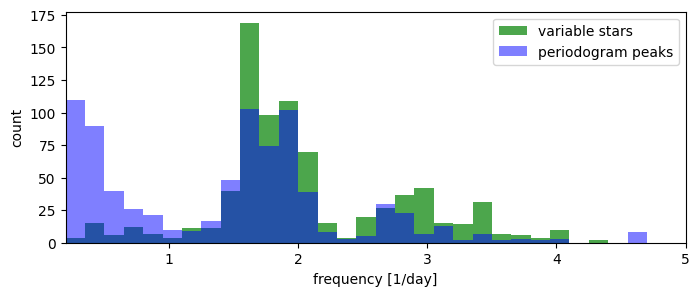

0.020992216369211416


In [4]:
#frequency histogram for variable stars in GC Simbad files
import matplotlib.pyplot as plt
import numpy as np
freqs = [1.732312655, 1.863668893, 1.974828832, 1.35778247, 1.740062503, 2.069356554, 2.026120749, 1.724444169, 2.818918325, 2.031376644, 1.844450142, 1.998437222, 2.811824283, 1.884566531, 1.844450142, 1.732312655, 3.469150578, 2.069356554, 1.593077124, 1.740062503, 1.998437222, 1.903376971, 1.597278238, 1.693047163, 2.818918325, 2.798408265, 1.974828832, 1.973270083, 1.724444169, 1.660701979, 1.884566531, 1.884566531, 2.057215271, 1.786636318, 1.844450142, 1.795689985, 1.677815752, 1.63670675, 1.973270083, 1.593077124, 2.757586119, 2.938834047, 3.469150578, 2.773540424, 2.09398649, 2.811824283, 2.757586119, 1.650445538, 1.935887285, 1.934355705, 1.793210546, 1.603532904, 1.954911912, 2.773540424, 1.571978539, 1.974828832, 1.618335089, 2.789851636, 1.998529083, 1.861885345, 1.68124587, 1.829079808, 2.071585716, 1.795689985, 1.746529646, 1.974828832, 1.730573876, 1.863668893, 1.63670675, 2.00762899, 2.007737822, 1.358883976, 2.09398649, 2.007737822, 2.00762899, 2.707700972, 2.757228765, 2.757586119, 2.789190214, 2.789851636, 2.838699421, 1.63670675, 1.603532904, 2.757586119, 2.819752933, 1.358883976, 3.453730374, 3.469150578, 0.662362634, 0.662362634, 1.602058325, 1.602058325, 0.662362634, 0.662362634, 0.662362634, 1.602058325, 1.602058325, 1.602058325, 0.662362634, 1.602058325, 0.662362634, 0.662362634, 1.602058325, 1.602058325, 1.877186923, 0.726744186, 0.726913236, 1.823978754, 1.773206845, 3.760373932, 1.774512674, 2.045671666, 1.780385845, 2.050007893, 1.688213903, 1.796709506, 1.796941964, 2.116859089, 1.142149663, 1.459334193, 1.638041885, 1.638565272, 1.657789205, 1.69705815, 1.7118246, 1.73899434, 1.745386507, 1.799001195, 1.813101836, 1.824098531, 1.825057307, 1.838397506, 1.902497027, 1.944405556, 1.979104613, 2.029323728, 2.036124928, 2.036805068, 2.052364015, 2.137953594, 2.145945772, 2.211440223, 3.284827382, 2.293577982, 2.656917551, 2.709285534, 4.03399854, 3.068811971, 3.147791981, 3.172387539, 3.172598898, 3.216758023, 3.389727093, 3.459884371, 3.782606064, 3.787878788, 4.038772213, 1.423416627, 2.456803257, 1.77479612, 1.496056395, 1.558885335, 2.407631228, 2.530101887, 2.74022152, 2.722229179, 1.729580144, 2.592090495, 2.713755757, 2.74022152, 1.866775686, 2.722229179, 2.561422922, 2.592090495, 2.561422922, 2.577578674, 2.61224831, 1.867124237, 1.867124237, 2.456803257, 2.656430554, 1.423416627, 2.407631228, 2.61224831, 2.698225108, 2.722229179, 1.496056395, 2.764439358, 1.354552855, 2.764439358, 1.624573955, 1.423416627, 2.456803257, 1.36307007, 1.77479612, 2.561422922, 2.74022152, 2.656430554, 1.729580144, 2.499144043, 2.713755757, 2.592090495, 2.530101887, 1.866775686, 1.862263283, 1.867124237, 2.112873952, 2.502126808, 2.456803257, 2.559279307, 1.866775686, 1.77479612, 2.656430554, 2.596788811, 2.600043161, 2.407631228, 2.681497133, 2.701716941, 2.61224831, 2.864927274, 1.354552855, 1.358612585, 1.577802216, 1.494918026, 1.450574573, 0.942098619, 1.613801228, 1.553019302, 1.58984534, 1.934977032, 1.678083226, 1.599378162, 1.644147329, 3.241816844, 0.942098619, 1.422916352, 1.934977032, 1.678083226, 1.599378162, 1.644147329, 1.613801228, 0.942098619, 1.422916352, 1.553019302, 1.666513903, 1.934977032, 1.678083226, 1.599378162, 1.427747414, 1.644147329, 2.650628597, 3.241816844, 0.942098619, 1.58984534, 1.553019302, 1.666513903, 1.613801228, 1.934977032, 1.678083226, 1.599378162, 1.427747414, 1.644147329, 3.241816844, 1.954533639, 2.028903763, 1.948159476, 1.772776185, 1.510149716, 1.714122138, 1.638616287, 3.480064451, 1.529554823, 2.931940857, 2.974641184, 3.304954788, 3.364499817, 3.480064451, 3.672136927, 1.948159476, 1.90049755, 1.670076406, 1.714122138, 1.90049755, 1.948159476, 2.028903763, 1.862183522, 1.510149716, 1.772776185, 1.638616287, 1.948159476, 1.90049755, 1.772776185, 1.638616287, 1.847575058, 1.670076406, 1.670076406, 1.601550301, 3.364499817, 2.076088649, 2.931940857, 3.304954788, 3.364499817, 3.364499817, 3.480064451, 3.480064451, 3.672136927, 1.862183522, 1.948159476, 1.862183522, 2.028903763, 1.742242231, 1.772776185, 1.714122138, 1.90049755, 1.638616287, 1.670076406, 2.076088649, 2.962515294, 2.931940857, 2.962515294, 3.304954788, 3.364499817, 3.364499817, 3.480064451, 1.742242231, 2.962515294, 1.948159476, 2.028903763, 1.742242231, 1.510149716, 1.90049755, 1.714122138, 1.811151258, 1.90049755, 1.948159476, 1.695973082, 1.670076406, 1.670076406, 1.601550301, 1.601550301, 2.931940857, 2.974641184, 2.962515294, 3.304954788, 3.364499817, 3.480064451, 3.480064451, 1.847298603, 1.787671147, 1.920901133, 2.046249327, 1.709118317, 1.701044782, 1.515861214, 3.539246707, 1.708867141, 1.561882568, 2.243706963, 1.561882568, 1.561882568, 2.243706963, 2.243706963, 1.561882568, 1.561882568, 2.243706963, 2.243706963, 1.561882568, 1.561882568, 2.692761319, 2.243706963, 2.243706963, 1.561882568, 0.566431031, 0.474390053, 0.450022726, 1.636824626, 1.669755715, 1.669755715, 1.636824626, 0.308651502, 1.245238519, 1.245238519, 1.245238519, 1.610858475, 1.654711377, 1.611146556, 1.655330412, 2.93668507, 1.768496707, 2.93668507, 2.176434869, 2.93668507, 3.484065626, 0.474390053, 1.245238519, 1.610858475, 1.636824626, 1.654711377, 1.768496707, 2.93668507, 3.484065626, 0.566431031, 1.669755715, 0.450022726, 0.474390053, 1.636824626, 1.744503506, 0.308651502, 1.245238519, 1.610858475, 1.636824626, 0.566431031, 1.654711377, 1.611146556, 1.744503506, 1.655330412, 1.768496707, 2.176434869, 2.93668507, 3.484065626, 0.566431031, 0.474390053, 0.308651502, 1.245238519, 1.610858475, 1.744503506, 1.636824626, 1.654711377, 1.768496707, 2.93668507, 3.484065626, 0.566431031, 0.450022726, 0.308651502, 1.611146556, 1.744503506, 1.655330412, 2.176434869, 1.891961434, 2.040437388, 1.943162497, 1.78947538, 1.827685784, 1.931643017, 1.816200509, 1.78947538, 1.809699264, 1.804500424, 1.885497507, 1.885497507, 1.988071571, 1.565067689, 2, 1.551094607, 1.565067689, 2, 1.551094607, 1.565067689, 1.555209953, 1.554467774, 1.551094607, 1.641453934, 1.526717557, 1.460399799, 1.085955554, 1.943162497, 1.641453934, 1.460399799, 1.78947538, 1.472793093, 2.040437388, 1.891961434, 1.532449621, 1.943162497, 2, 1.885497507, 1.885497507, 2, 1.565067689, 1.551094607, 1.78947538, 1.641453934, 1.085955554, 2.040437388, 1.943162497, 2.107814723, 1.891961434, 1.78947538, 1.885497507, 2, 1.78947538, 1.885497507, 2, 1.885497507, 2.040437388, 2, 2.040437388, 1.565067689, 1.551094607, 1.565067689, 1.551094607, 1.641453934, 1.085955554, 1.498441621, 1.496121306, 1.144184397, 1.498441621, 1.496121306, 1.144184397, 1.499129006, 2.755959763, 2.841466083, 3.422536031, 1.28888402, 3.422536031, 2.638821819, 1.499129006, 1.499129006, 2.755959763, 1.28888402, 1.409834725, 1.730031971, 1.421526748, 1.625540492, 1.699766792, 2.670711905, 2.985894634, 1.730031971, 1.955871624, 1.61050565, 2.985894634, 1.578008868, 1.568848936, 1.568848936, 1.578008868, 1.568848936, 1.884033943, 1.884033943, 0.421562234, 0.421562234, 0.477639315, 0.421562234, 1.66767561, 1.884033943, 2.630616695, 2.56057029, 3.287927061, 2.933256678, 3.168929282, 3.183577832, 0.477639315, 1.406926864, 1.568848936, 1.66767561, 1.884033943, 2.933256678, 2.933256678, 3.168929282, 3.183577832, 3.287927061, 3.183577832, 1.32599088, 2.867375291, 1.803003804, 1.685783451, 1.644298723, 1.572139178, 1.644298723, 1.594540294, 1.572139178, 2.762507252, 2.762507252, 2.436368155, 1.325465371, 1.093395671, 2.63456016, 0.659861297, 2.100963922, 2.037386034, 1.775438933, 1.859250982, 1.800461999, 2.146134597, 2.146231325, 2.037386034, 1.904206964, 1.780499964, 1.775438933, 2.100963922, 1.753247892, 1.904206964, 1.972581122, 1.904206964, 1.690897224, 2.005213555, 1.914986107, 1.904206964, 2.037386034, 1.575775912, 2.054122007, 1.608461796, 2.037386034, 1.588527022, 1.775438933, 1.576145976, 1.575775912, 1.566666353, 2.100963922, 1.775438933, 1.478113572, 1.575775912, 1.575775912, 2.798408265, 2.798408265, 1.478113572, 2.926869245, 2.938963604, 2.926869245, 2.994594756, 1.566666353, 3.002966931, 2.938963604, 1.575775912, 1.576145976, 1.588527022, 1.608461796, 2.994594756, 3.002966931, 3.098594168, 2.798408265, 1.690897224, 3.098594168, 2.926869245, 1.753247892, 2.938963604, 1.775438933, 1.780499964, 1.800461999, 2.926869245, 2.994594756, 2.938963604, 0.659861297, 1.859250982, 3.295577006, 2.994594756, 3.002966931, 1.904206964, 3.098594168, 3.098594168, 2.005213555, 2.037386034, 2.054122007, 2.926869245, 2.938963604, 2.994594756, 3.098594168, 1.902312451, 1.980959022, 2.045106877, 1.917247753, 2.022886943, 1.630204428, 3.806507605, 3.55378656, 1.949747215, 3.987224931, 1.543793564, 0.81366965, 0.49689441, 3.481700184, 3.987224931, 2.045106877, 3.939567042, 1.949747215, 2.045106877, 1.630204428, 2.235666027, 1.666080762, 1.917247753, 1.682063151, 2.011085101, 1.980959022, 2.098904582, 1.876845173, 2.790116292, 0.49689441, 0.506532753, 3.5720792, 3.584614833, 3.634975737, 3.987224931, 3.688349242, 3.46274776, 3.481700184, 3.987224931, 3.939567042, 2.022886943, 2.235666027, 2.011085101, 1.666080762, 1.949747215, 1.917247753, 2.045106877, 1.630204428, 1.876845173, 1.543793564, 2.790116292, 0.81366965, 0.49689441, 2.790116292, 3.987224931, 3.481700184, 3.987224931, 2.011085101, 1.876845173, 3.939567042, 1.834758023, 3.314419049, 1.678046619, 1.678046619, 1.784904704, 1.678046619, 1.784904704, 1.678046619, 4.312984672, 4.312984672, 2.017784755, 1.671634206, 2.074736145, 1.915617068, 1.953300492, 1.820979505, 1.852513954, 1.925276181, 1.989744855, 1.781537217, 1.953300492, 1.907505079, 1.852513954, 1.909661551, 1.926103127, 2.154104646, 1.964597945, 1.653269671, 1.898192351, 1.770660509, 1.864589762, 1.850741407, 1.746743197, 1.79913066, 1.760665672, 1.759259422, 1.514580105, 1.496992542, 1.63024695, 1.514580105, 1.576126103, 1.496992542, 1.58625164, 2.494736107, 2.494736107, 2.815743384, 2.815743384, 2.982012501, 3.043630442, 0.918627093, 3.216944289, 3.49142506, 3.50320368, 4.071114223, 4.071114223, 1.777269084, 1.765742477, 1.826754278, 1.669775232, 1.897900542, 1.644974931, 1.641031027, 1.632485148, 1.595945023, 1.566551003, 2.008290222, 2.078976146, 2.841748698, 2.843866065, 2.882600336, 3.190555954, 3.603564646, 1.242328621, 1.242328621]
peaks = [2.776793241, 2.714774328, 1.739163212, 2.831078763, 2.076908757, 1.972400005, 1.909769622, 1.656987832, 1.727975329, 1.86110026, 1.733560245, 2.023979951, 1.966045632, 1.356539463, 1.867115444, 2.776793241, 2.714774328, 2.831078763, 1.807828202, 1.750423532, 2.004481268, 1.744784288, 2.776793241, 1.86110026, 2.840228973, 1.991586617, 1.744784288, 2.070217693, 1.86110026, 2.831078763, 2.776793241, 2.723548636, 2.831078763, 1.915942108, 1.966045632, 1.867115444, 1.915942108, 1.99802354, 2.831078763, 1.966045632, 2.776793241, 1.909769622, 1.86110026, 2.723548636, 1.978774916, 2.767847398, 2.821958031, 2.714774328, 1.867115444, 0.423181357, 1.99802354, 1.940832196, 1.594052066, 1.867115444, 1.646328576, 1.99802354, 1.807828202, 1.594052066, 1.651649605, 2.812866683, 0.599622441, 0.26164818, 1.103424805, 0.727716064, 0.308453135, 0.313470153, 0.233705358, 0.274624158, 0.441310992, 0.396733157, 0.658443506, 0.737169855, 0.574989163, 0.525315748, 0.935990135, 0.258292688, 1.004852002, 0.935990135, 1.991586617, 0.652100171, 0.200171112, 0.258292688, 1.004852002, 0.411068231, 0.935990135, 0.660571633, 0.580582397, 0.741942707, 0.788854663, 0.533860056, 0.229964957, 0.660571633, 0.972944546, 0.725371621, 0.91804266, 0.225555413, 0.658443506, 0.96668568, 0.434247911, 0.91804266, 0.662706639, 0.718383513, 0.605455296, 1.317709933, 0.25996502, 0.447044082, 0.51690819, 0.222662791, 0.386622645, 0.580582397, 0.241369662, 0.332216671, 0.460217324, 0.756447477, 0.399301831, 0.658443506, 0.59769067, 0.744340709, 0.796528283, 0.871847327, 2.688620648, 2.628571046, 2.74118242, 1.813671208, 1.705815011, 1.819533098, 0.25580434, 1.761756757, 1.651649605, 1.705815011, 1.761756757, 1.819533098, 1.711328304, 2.151953253, 0.723034731, 1.778894327, 2.61166168, 1.722408405, 1.83723269, 2.74118242, 1.767450857, 1.825413934, 2.74118242, 2.61166168, 1.614760466, 1.773163361, 1.722408405, 2.536905584, 2.688620648, 2.456350236, 2.61166168, 2.75004208, 1.494426205, 2.520585894, 1.662343313, 2.603247833, 2.75004208, 1.423814638, 2.697310425, 1.767450857, 2.61166168, 2.75004208, 1.423814638, 2.697310425, 2.456350236, 1.365322462, 0.329016151, 0.211458538, 1.451649811, 0.280897936, 1.365322462, 0.332216671, 1.456341627, 0.212141984, 1.57360924, 1.360923877, 1.57360924, 1.50410196, 1.23934778, 3.159363523, 0.942050261, 1.897484243, 0.2087467, 1.609558281, 1.953398234, 0.942050261, 1.543435512, 1.897484243, 1.604372855, 1.95971173, 0.945095022, 1.897484243, 1.604372855, 1.548423985, 3.231539058, 1.891371222, 0.942050261, 1.594052066, 1.95971173, 0.880328262, 1.891371222, 0.939015309, 1.553428581, 1.614760466, 1.95971173, 1.891371222, 0.945095022, 1.419227612, 1.667716103, 3.785106278, 1.614760466, 1.423814638, 0.229224092, 0.292931966, 0.532140148, 1.614760466, 0.945095022, 1.548423985, 1.423814638, 1.678513834, 1.619979465, 1.419227612, 0.948149623, 1.678513834, 1.897484243, 1.891371222, 1.484812694, 1.543435512, 0.932974706, 1.953398234, 1.891371222, 1.953398234, 0.935990135, 1.533506728, 1.673106258, 1.891371222, 1.678513834, 0.939015309, 1.594052066, 1.543435512, 1.953398234, 0.303516414, 2.017459406, 1.599204134, 1.523641815, 1.947105078, 2.017459406, 0.30548155, 1.599204134, 1.528566313, 1.953398234, 1.528566313, 2.030521571, 1.784643816, 3.896643646, 1.95971173, 0.217689678, 1.86110026, 2.017459406, 0.409743915, 1.855104455, 1.95971173, 2.017459406, 1.909769622, 1.662343313, 1.953398234, 1.849127966, 1.897484243, 3.712527418, 2.017459406, 1.784643816, 2.017459406, 0.25171025, 1.95971173, 0.361291595, 1.756081002, 1.802004021, 2.023979951, 1.940832196, 3.480500028, 1.756081002, 1.947105078, 2.023979951, 1.867115444, 3.480500028, 1.897484243, 1.739163212, 1.947105078, 1.83723269, 0.218393264, 1.897484243, 1.739163212, 1.947105078, 1.843170732, 1.523641815, 1.947105078, 1.733560245, 1.891371222, 2.961908047, 2.037084335, 0.329016151, 2.070217693, 1.978774916, 1.909769622, 1.784643816, 2.070217693, 1.784643816, 2.004481268, 1.95971173, 0.546056068, 1.784643816, 1.903617022, 2.004481268, 3.413761949, 2.070217693, 1.56348635, 2.697310425, 3.128926744, 1.63573789, 1.494426205, 1.56348635, 3.118846452, 1.494426205, 1.630468123, 4.683500496, 1.56348635, 3.128926744, 4.683500496, 1.499256277, 0.33007955, 1.56348635, 1.499256277, 3.128926744, 2.697310425, 1.630468123, 1.56348635, 1.494426205, 3.128926744, 1.625215333, 4.683500496, 1.56348635, 3.128926744, 1.50410196, 4.683500496, 1.619979465, 1.56348635, 2.706028288, 1.630468123, 3.128926744, 0.276402229, 1.56348635, 3.128926744, 1.625215333, 1.499256277, 2.723548636, 1.56348635, 3.118846452, 2.732351303, 4.683500496, 2.244145706, 1.56348635, 2.697310425, 2.74118242, 3.118846452, 1.630468123, 1.56348635, 3.118846452, 2.732351303, 1.625215333, 1.499256277, 1.558449352, 3.128926744, 2.732351303, 4.683500496, 2.244145706, 0.376769793, 0.492484303, 1.641024689, 1.694841654, 0.313470153, 0.374346066, 0.226284421, 1.646328576, 0.489316195, 0.434247911, 0.576847561, 0.434247911, 1.651649605, 0.487739791, 1.694841654, 0.466196028, 0.408423865, 0.571290309, 0.525315748, 1.972400005, 0.470730971, 0.417754292, 0.56396383, 0.521936438, 0.375555974, 0.458734667, 0.571290309, 0.395455024, 0.525315748, 1.656987832, 0.207403851, 0.347569005, 0.257460561, 0.498882188, 0.565786594, 0.345333125, 0.208074193, 0.497274966, 0.257460561, 1.656987832, 0.439889244, 0.492484303, 0.565786594, 1.716859416, 1.662343313, 0.470730971, 0.571290309, 0.345333125, 0.395455024, 1.855104455, 0.464694109, 0.569449814, 0.394181008, 1.673106258, 1.849127966, 0.464694109, 0.571290309, 1.662343313, 1.903617022, 0.390383534, 0.290109909, 0.432848918, 0.623296509, 0.483040988, 0.227749513, 0.289175278, 0.435651425, 0.483040988, 0.62531104, 0.574989163, 0.461704773, 0.571290309, 1.909769622, 0.311453627, 2.030521571, 0.225555413, 0.303516414, 0.389125857, 0.423181357, 0.350949999, 0.415066916, 1.947105078, 0.523623367, 1.897484243, 0.272857525, 1.953398234, 1.802004021, 1.891371222, 3.896643646, 1.761756757, 0.247681685, 0.333290414, 0.470730971, 0.382897987, 1.465770801, 0.247681685, 0.334367628, 1.873150069, 1.465770801, 1.802004021, 1.879204198, 1.553428581, 1.790411889, 1.470508257, 1.972400005, 1.825413934, 0.206069641, 0.260805242, 1.947105078, 1.694841654, 1.947105078, 1.825413934, 0.265047263, 0.215592493, 0.384135535, 1.947105078, 1.807828202, 2.037084335, 1.86110026, 1.903617022, 1.508963305, 1.58379767, 2.990720143, 3.049187875, 1.169413136, 1.508963305, 1.58379767, 3.000386324, 2.569862635, 1.165645702, 1.50410196, 3.000386324, 1.599204134, 1.339142603, 2.448436747, 0.201467132, 0.250899329, 0.343111627, 0.30156392, 0.394181008, 1.499256277, 1.442311476, 0.2040844, 0.262493842, 1.558449352, 1.499256277, 0.246088371, 2.75004208, 2.794771761, 2.706028288, 0.201467132, 0.300592388, 0.360127641, 0.26164818, 0.415066916, 0.205405757, 0.268490503, 0.338711412, 0.399301831, 0.455783668, 1.568539629, 1.508963305, 0.286389411, 2.645589892, 3.36998236, 1.219512303, 1.284128866, 0.431454432, 1.154416066, 0.498882188, 1.656987832, 1.3965132, 1.594052066, 0.228485613, 1.334828361, 1.609558281, 1.722408405, 1.689381476, 1.405555011, 1.656987832, 1.57360924, 0.401887135, 1.508963305, 0.483040988, 0.319598406, 1.568539629, 1.50410196, 0.490897693, 0.421818016, 0.666997374, 1.578695236, 0.479933628, 1.518733181, 0.417754292, 0.613320792, 0.669153148, 0.613320792, 0.528716937, 0.26935828, 0.218393264, 0.67131589, 0.415066916, 0.270228862, 0.358967438, 1.711328304, 0.425921271, 2.933373521, 1.588916596, 1.651649605, 0.675662366, 1.508963305, 0.489316195, 1.451649811, 0.666997374, 0.419104498, 0.417754292, 0.484602204, 1.513840362, 1.3965132, 1.451649811, 0.481484801, 1.499256277, 0.420459068, 1.387529554, 0.677846146, 2.867857431, 0.208074193, 0.363630799, 0.303516414, 1.630468123, 2.867857431, 1.630468123, 1.383059426, 1.326241528, 1.802004021, 2.867857431, 1.630468123, 1.326241528, 1.802004021, 1.694841654, 0.204744013, 1.075304669, 0.863448096, 0.286389411, 1.14698981, 0.212827639, 1.075304669, 2.186954965, 0.863448096, 2.43268617, 0.25009102, 0.654207797, 1.778894327, 1.843170732, 2.030521571, 0.252523792, 0.656322234, 1.778894327, 1.83723269, 2.037084335, 1.843170732, 0.656322234, 1.784643816, 2.030521571, 1.891371222, 2.043668309, 1.667716103, 1.909769622, 1.985170431, 1.722408405, 2.043668309, 1.985170431, 1.614760466, 0.314483307, 1.662343313, 2.037084335, 1.985170431, 1.903617022, 3.252461858, 1.614760466, 1.99802354, 1.630468123, 1.891371222, 1.694841654, 2.236915865, 1.99802354, 1.683938888, 1.630468123, 2.236915865, 1.940832196, 1.99802354, 1.673106258, 1.625215333, 2.229709315, 1.909769622, 1.897484243, 2.030521571, 1.641024689, 2.070217693, 1.985170431, 2.030521571, 1.646328576, 1.985170431, 4.03744023, 3.960022903, 2.023979951, 1.651649605, 2.236915865, 1.934579523, 4.03744023, 0.486168467, 0.245295561, 0.347569005, 0.573136752, 1.334828361, 0.240592055, 0.487739791, 0.574989163, 0.343111627, 0.417754292, 0.495672923, 0.242149783, 0.560335901, 0.427297873, 1.34347079, 0.206069641, 0.384135535, 0.281805815, 0.259127505, 0.334367628, 1.678513834, 1.727975329, 0.279992983, 1.588916596, 1.630468123, 1.678513834, 0.267625522, 0.368354743, 0.2087467, 1.784643816, 0.405796511, 1.678513834, 0.232201952, 0.281805815, 4.683500496, 1.678513834, 0.208074193, 1.778894327, 0.409743915, 3.359125472, 1.678513834, 3.359125472, 1.767450857, 0.224104435, 4.683500496, 0.210777294, 0.264193374, 0.413729718, 0.472252401, 0.355509206, 0.212141984, 0.270228862, 0.479933628, 0.420459068, 0.549591541, 0.232201952, 1.683938888, 1.784643816, 0.294828572, 3.359125472, 2.758930375, 0.960467077, 1.02119601, 0.326899619, 2.697310425, 0.324796703, 0.371937931, 0.419104498, 0.639596246, 0.505363188, 0.336532512, 0.439889244, 1.004852002, 0.567615249, 0.511928383, 2.010959867, 1.86110026, 0.863448096, 1.915942108, 1.95971173, 1.86110026, 2.010959867, 2.070217693, 1.807828202, 3.700566971, 2.070217693, 2.010959867, 1.909769622, 1.86110026, 1.947105078, 1.778894327, 1.722408405, 1.843170732, 1.599204134, 2.117511735, 1.778894327, 1.83723269, 1.722408405, 1.599204134, 2.117511735, 1.778894327, 1.83723269, 2.004481268, 3.537110673, 1.711328304, 0.435651425, 0.287315039, 0.588124768, 0.228485613, 0.490897693, 0.321667666, 3.514356752, 1.231375165, 1.031129741, 2.952365829, 1.243353424, 2.424848918, 1.30081104, 0.371937931, 1.790411889]
plt.figure(figsize=(8,3))
plt.hist(freqs, bins=np.arange(0.2,5,0.15), color='g', alpha=0.7, label='variable stars')
plt.hist(peaks, bins=np.arange(0.2,5,0.15), color='b', alpha=0.5, label='periodogram peaks')
plt.xlim(0.2,5)
plt.xlabel(r'frequency [1/day]')
plt.ylabel('count')
plt.legend()
plt.savefig('../figures/python plots/variables histogram')
plt.show()

matches = 0
for a in freqs:
    for b in peaks:
        if abs(a - b) <= 0.02:
            matches += 1
probability = matches / len(freqs) / len(peaks)
print(probability)

In [28]:
#convert hdf5 to csv
import h5py
import numpy as np
import pandas as pd
import os

def convert_hdf5_to_csv(hdf5_file, csv_file, dataset_path=None):
    """
  Converts an HDF5 file to a CSV file.

  Args:
      hdf5_file (str): Path to the HDF5 file.
      csv_file (str): Path to the output CSV file.
      dataset_path (str, optional): Path to the specific dataset within the HDF5 file to convert. 
          If None, all datasets will be converted to separate CSV files with names based on their paths.
    """
  # Open the HDF5 file
    with h5py.File(hdf5_file, 'r') as f:
    # Check if dataset path is provided
        if dataset_path:
            # Access specific dataset
            dataset = f[dataset_path]
            # Convert data to numpy array
            #data = np.array(dataset).astype(str)
            data = {}
            for name in dataset.dtype.names:
                data[name] = dataset[name]
            # Create pandas DataFrame
            df = pd.DataFrame(data)
            # Save DataFrame to CSV
            df.to_csv(csv_file, index=False)
        else:
            dataset = f["data"]
            # Loop through all datasets in the file
            #for name, dataset in f.items():
                # Convert data to numpy array
            #data = np.array(dataset).astype(str)
            data = {}
            for name in dataset.dtype.names:
                data[name] = dataset[name]
            # Create pandas DataFrame
            df = pd.DataFrame(data)
            # Save DataFrame to CSV
            df.to_csv(csv_file, index=False)
            #print(f"Converted {hdf5_file} to {csv_file}")
                
#file = "ESO 452-SC11_simbad_results"
#directory = '../elk/elk results/GC simbad/'

# Convert a specific dataset (provide path)
# convert_hdf5_to_csv(hdf5_file, csv_file, dataset_path="/data/my_dataset")

# Convert all datasets (without providing path)
#convert_hdf5_to_csv(directory+file+'.hdf5', directory+file+'.csv')

def convert_folder_hdf5_to_csv(folder_path, output_folder=None):
    """
  Converts all HDF5 files in a folder to CSV files.

  Args:
      folder_path (str): Path to the folder containing HDF5 files.
      output_folder (str, optional): Path to the folder to store output CSV files. 
          If None, CSV files will be saved in the same folder as the HDF5 files.
    """
    # Create output folder if not provided
    if not output_folder:
        output_folder = folder_path
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

    # Loop through files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".hdf5"):
            # Get full file paths
            hdf5_file = os.path.join(folder_path, filename)
            csv_file = os.path.join(output_folder, os.path.splitext(filename)[0] + ".csv")

            # Convert the HDF5 file to CSV
            convert_hdf5_to_csv(hdf5_file, csv_file)

folder_path = "../elk/elk results/GC new"

# Convert all HDF5 files in the folder, saving CSVs in the same folder
convert_folder_hdf5_to_csv(folder_path)

# Optionally, specify a separate output folder
# output_folder = "converted_csv_folder"
# convert_folder_hdf5_to_csv(folder_path, output_folder)

print('Donepezil')

Donepezil


In [29]:
#merge csv files
folder = '../elk/elk results/GC new'
all_files, filenames = [], []
for filename in os.listdir(folder):
    if filename.endswith(".csv"): # and filename.startswith('M 92'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['filename'] = filename
        all_files.append(df)
        filenames.append(filename[:-4])
merged_df = pd.DataFrame()
for i, df in enumerate(all_files):
    merged_df = pd.concat([merged_df, pd.Series(['**' + filenames[i] + '**']), df])
merged_df = merged_df.iloc[1:]
#merged_df = pd.concat(all_files, ignore_index=True)
merged_df.to_csv(folder+"/Simbad sectors merged.csv", index=False)
print('Doneald Duck')

Doneald Duck


In [ ]:
#old: combine csv files into one
import pandas as pd
import os
directory = '../comparison/Simbad tests'
combined_df = pd.DataFrame()
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df.iloc[0] = filename.replace('.csv', '')
        combined_df = pd.concat([combined_df, df, pd.DataFrame([['']*len(df.columns)], columns=df.columns)], ignore_index=True)
combined_df.to_csv('../comparison/Simbad tests/MW GCs variables.csv', index=False)

In [ ]:
with open('../targets/targets galaxies with Cepheids 20.2 mag.txt', 'r') as file:
    galaxies = [line.strip() for line in file]

original_stdout = sys.stdout 
sys.stdout = open('galaxies with Cepheids info.txt', 'w')

for i,galaxy in enumerate(galaxies):
    galaxyname = galaxy.strip().replace("â€“", "-").replace(" ","")
    folder_path = "../quaver/results/"+catalog_q+'/'+galaxyname
    for filename in os.listdir(folder_path):
        #print(filename)
        if filename.startswith(galaxyname+"_sector") and filename.endswith("_"+method+"_lc.dat"):
            sector = filename.split("_")[1].replace("sector", "")
            file = galaxyname+'_sector'+sector+'_'+method+'_lc'
            full_file_path = os.path.join(folder_path, file + ".fits")
            if not os.path.exists(full_file_path):
                data = np.genfromtxt(folder_path+'/'+file+'.dat', names=['time', 'flux', 'flux_err'], dtype=None)
                table = Table(data)
                table.write(folder_path+'/'+file+'.fits', format='fits', overwrite=True)               
            lc_quaver = fits.open(full_file_path)
            data_q = lc_quaver[1].data
            time_q = data_q['time']
            flux_q = data_q['flux']
            tesslc = lk.LightCurve(time=time_q, flux=flux_q)
            pg = tesslc.to_periodogram(frequency=np.logspace(-1, 1, 500))
            powers = pg.power.value
            freqs = pg.frequency.value
            peaks, _ = find_peaks(powers)
            peakfreqs = freqs[peaks]
            peakpowers = powers[peaks]
            sorted_peaks = sorted(zip(peakpowers, peakfreqs), reverse=True)[:5]
            powers_highestpeaks = [power for power, freq in sorted_peaks]
            freqs_highestpeaks = [freq for power, freq in sorted_peaks]
            
            fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
            pg.plot(ax=ax1, color="black", linewidth=1.25)
            ax1.set_xscale('log')
            ax1.set_title(galaxy+', sector '+sector+' (quaver)')
            
            try:
                a = elk.ensemble.from_fits(directory+'/'+galaxy+'/'+galaxy+"output_table.fits")
                if len(a.lcs) > 0:
                    for sec in range(0,len(a.lcs)):
                        if a.lcs[sec].sector == float(sector):
                            lc_e = a.lcs[sec]
                            if hasattr(lc_e, 'sector'):
                                lc_e.to_periodogram(frequencies=np.logspace(-1, 1, 500))
                                lc_e.plot_periodogram(fig=fig1,ax=ax2,title=galaxy+', sector '+sector+' (elk)') 
                                break #"""
                plt.tight_layout()
                plt.savefig(galaxy+'_'+sector+'_periodograms')
    
                stats = lc_e.get_stats_using_defaults()
                elk_peakfreqs = stats['peak_freqs']
                elp_peakpowers = stats['power_at_peaks']
                five_powers = sorted(elp_peakpowers, reverse=True)[:5]
                indices = sorted(range(len(elp_peakpowers)), key=lambda i: elp_peakpowers[i], reverse=True)[:5]
                five_freqs = [elk_peakfreqs[i] for i in indices]
                print('\n',galaxy,'sector',sector)
                print("quaver peaks:", freqs_highestpeaks)
                print("\tpowers:", powers_highestpeaks)
                print('elk peaks:', five_freqs)
                print('\tpowers:', five_powers)
                
            except FileNotFoundError:
                print('\n',galaxy,'sector',sector)
                print("quaver peaks:", freqs_highestpeaks)
                print("\tpowers:", powers_highestpeaks)
                plt.savefig(galaxy+'_'+sector+'_quaver_periodogram')

sys.stdout = original_stdout